## Exploratory Data Analysis (EDA) for Real Estate Pricing


Import Necessary libraries

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sqlalchemy import create_engine
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

## Tasks: 1
### LOAD DATASETS

In [5]:
df = pd.read_excel(r"C:\Users\oj\Downloads\P3\housing_data.xlsx")
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


Using df.head(), we observed that the dataset consists of 81 features and displays the first 5 records. This provides an initial understanding of the data structure, types of variables, and serves as the first step in Exploratory Data Analysis (EDA).

## Tasks: 2 
### Clean Data Process

In [8]:
print('Shape of Dataset:-\n', df.shape)

print('Columns Name:-\n ', df.columns.tolist())

Shape of Dataset:-
 (1460, 81)
Columns Name:-
  ['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

The dataset consists of 1460 rows and 81 columns. Each row corresponds to an individual property, and the columns describe different property characteristics, including structural details, location, condition, and sale information. The target variable is SalePrice. Some columns may have missing data, while others such as Unnamed: 0 appear to be indexing and may not contribute to the analysis.

In [10]:
print('Number of Duplicate Rows :-', df.duplicated().sum())

Number of Duplicate Rows :- 0


The dataset contains 1460 unique records with no duplicate entries. Hence, no duplicate data cleaning was required.

In [12]:
# Drop unnecessary columns

df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


The redundant Unnamed: 0 column was removed as it only represented an index and had no analytical value. This step reduced the dataset to 80 meaningful features, improving data quality for analysis.

In [14]:
# Quick info of datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

The dataset consists of 1460 records and 80 features. It includes 34 numerical, 45 categorical, and 1 float column. Several columns such as Alley, MasVnrType, GarageYrBlt, and Electrical contain missing values.

In [16]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


The statistical summary shows that the dataset has significant variation in property features. The average sale price is about 181,000, with values ranging from 34,900 to 755,000, indicating high price diversity. Most houses are of average quality (OverallQual around 6), with construction years spanning from 1872 to 2010. Features like PoolArea and MiscVal mostly contain zeros, suggesting rarity. The dataset also contains some outliers, such as very large LotArea values.

In [18]:
# Total No. of Missing Values in each columns

df.isnull().sum().sort_values(ascending=False).head()

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
dtype: int64

In [19]:
Missing_Count = df.isnull().sum()
Missing_Count = Missing_Count[Missing_Count > 0].sort_values(ascending=False) 
Missing_Pct = (Missing_Count / len(df))*100
Missing_df = pd.DataFrame({"Missing_Count":Missing_Count, "Missing_Pct":Missing_Pct})
print('Columns with missing Values:\n')
print(Missing_df.head(8))

Columns with missing Values:

             Missing_Count  Missing_Pct
Alley                 1369    93.767123
MasVnrType             872    59.726027
GarageYrBlt             81     5.547945
Electrical               1     0.068493


Note : Columns like Alley have >92% missing values, meaning they provide little value. I decided to drop them. For Fence (80% missing), I may keep it by treating “missing” as “no fence,” but dropping is also acceptable depending on downstream modeling needs.

C:\Users\oj\AppData\Local\Temp\ipykernel_5572\1896782887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Missing_df["Missing_Pct"],
C:\Users\oj\AppData\Local\Temp\ipykernel_5572\1896782887.py:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x=Missing_df["Missing_Pct"],


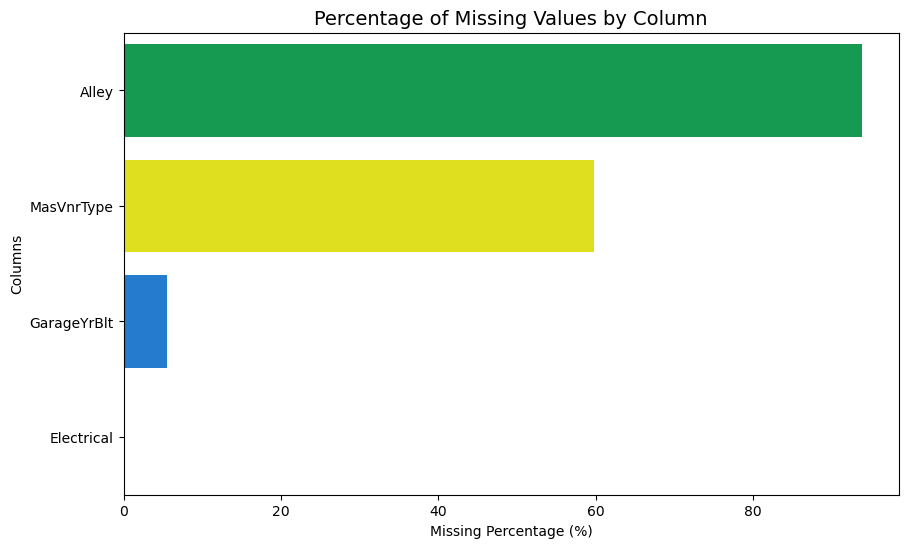

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=Missing_df["Missing_Pct"], 
            y=Missing_df.index, 
            palette=["#00B050", "#FFFF00", "#097DEA"]*3)
plt.title("Percentage of Missing Values by Column", fontsize=14)
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Columns")
plt.show()

In [22]:
# Handling Missing data

columns_to_drop = ['Alley']
df = df.drop(columns=columns_to_drop, axis = 1)
print ('Remaining columns after drop:', df.shape[1])

Remaining columns after drop: 79


Note : I dropped Alley since they had >92% missing values and were unlikely to add predictive value.

In [24]:
# Categorical features where NA means "None"

Cat_fill_None = ['MasVnrType','Electrical']

for col in Cat_fill_None:
    mode_val = df[col].mode()[0]  #get the most frequent value
    df[col] = df[col].fillna(mode_val)


# Numerical features where NA means 0 (Not Present)

Num_fill_Zero = ['GarageYrBlt']

for col in Num_fill_Zero:
    median_val = df[col].median()  
    df[col] = df[col].fillna(median_val)


Note : Missing values in categorical columns were imputed using the mode, and numeric columns using the median, as the missingness was minimal (<0.5%).

In [26]:
# checking back again , if any missing values are left

df.isnull().sum().sort_values(ascending=False).head()

MSSubClass      0
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
dtype: int64

In [27]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 79, dtype: int64

## Tasks: 3
### EDA Process

Explore individual variables to understand their distributions and characteristics.

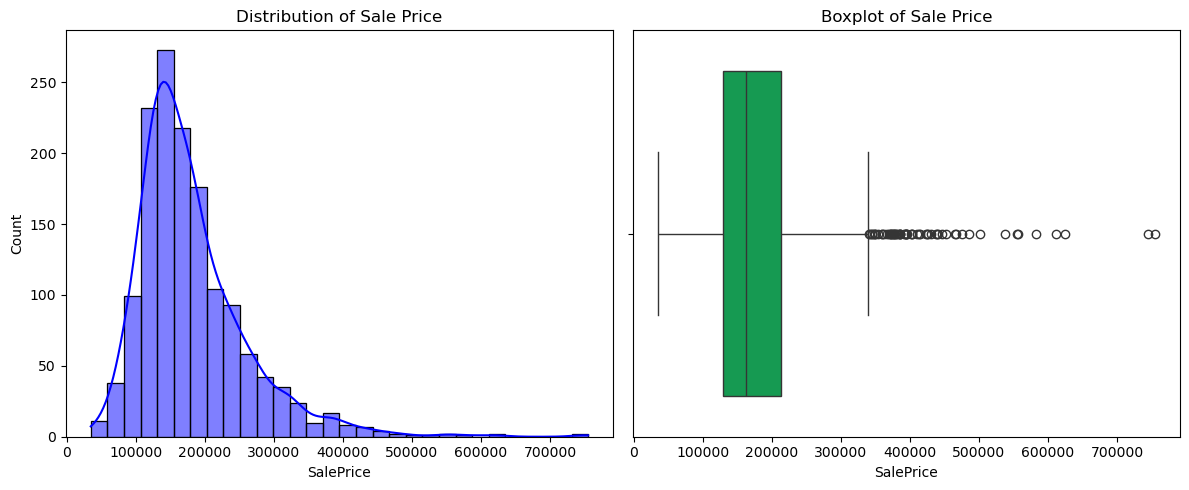

In [30]:
# Target variable analysis - SalePrice

plt.figure(figsize=(12, 5))

# First plot: Histogram (Distribution of Sale Price)
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30, color="blue")
plt.title("Distribution of Sale Price")

# Second plot: Boxplot (Boxplot of Sale Price)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SalePrice'], color="#00B050")
plt.title("Boxplot of Sale Price")

plt.tight_layout()
plt.show()

The distribution of Sale Price is right-skewed, with most houses between 100K–250K and a few high-value outliers and the boxplot shows a median of ~163K and several outliers, confirming skewness in house prices.

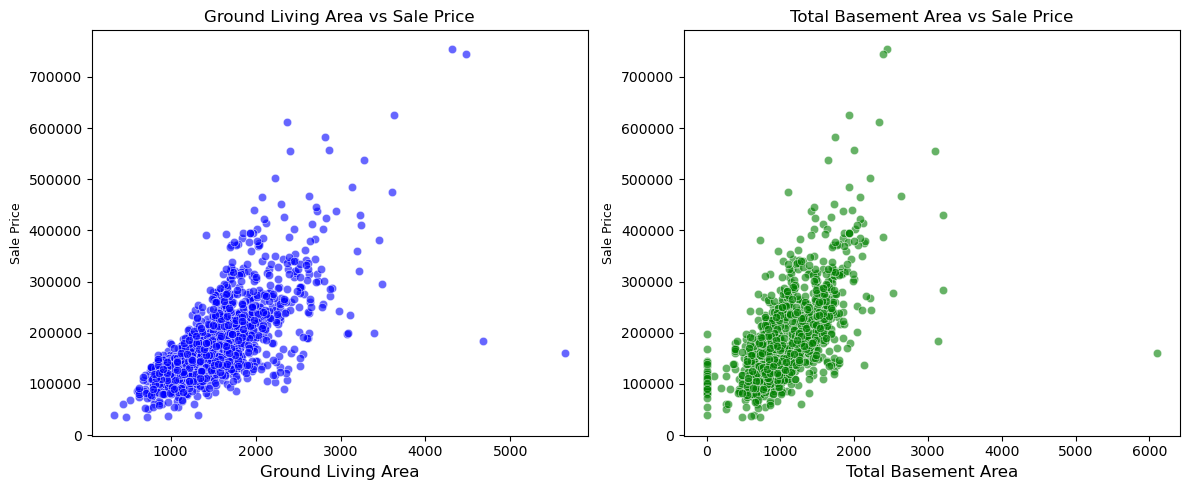

In [32]:
# Living Area (GrLivArea) vs SalePrice
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6, color="blue")
plt.xlabel("Ground Living Area", fontsize=12)
plt.ylabel("Sale Price", fontsize=9)
plt.title("Ground Living Area vs Sale Price")

# Total Basement Area vs SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, alpha=0.6, color="green")
plt.xlabel("Total Basement Area", fontsize=12)
plt.ylabel("Sale Price", fontsize=9)
plt.title("Total Basement Area vs Sale Price")
plt.tight_layout()
plt.show()

Houses with larger ground living areas generally sell for higher prices, though some homes with very large living spaces have lower-than-expected prices and houses with bigger total basement areas tend to have slightly higher sale prices, but the relationship is weaker and a few unusually large basements appear as outliers.

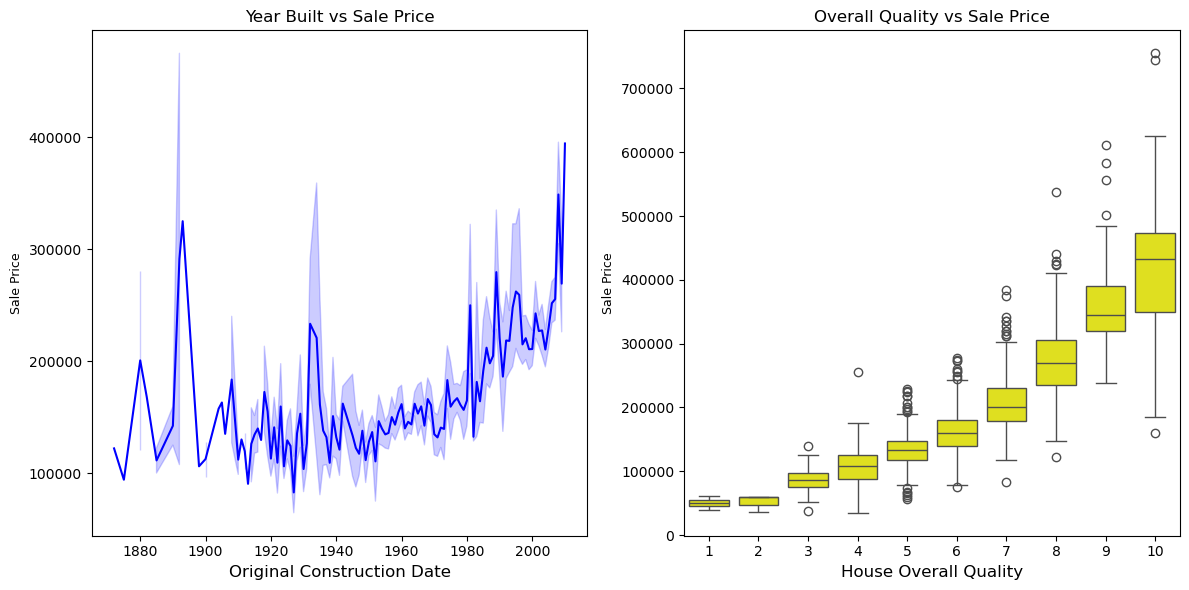

In [34]:
# Year Built vs SalePrice (line plot)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.lineplot(x='YearBuilt', y='SalePrice', data=df, color="blue")
plt.xlabel("Original Construction Date", fontsize=12)
plt.ylabel("Sale Price", fontsize=9)
plt.title("Year Built vs Sale Price")


plt.subplot(1, 2, 2)
sns.boxplot(x='OverallQual', y='SalePrice', data=df, color="Yellow")
plt.xlabel("House Overall Quality", fontsize=12)
plt.ylabel("Sale Price", fontsize=9)
plt.title("Overall Quality vs Sale Price")
plt.tight_layout()
plt.show()

Houses built in more recent years generally have higher sale prices, though some older homes may still command high prices and higher overall quality ratings strongly correspond to higher sale prices, with lower-quality homes showing much more price variability.

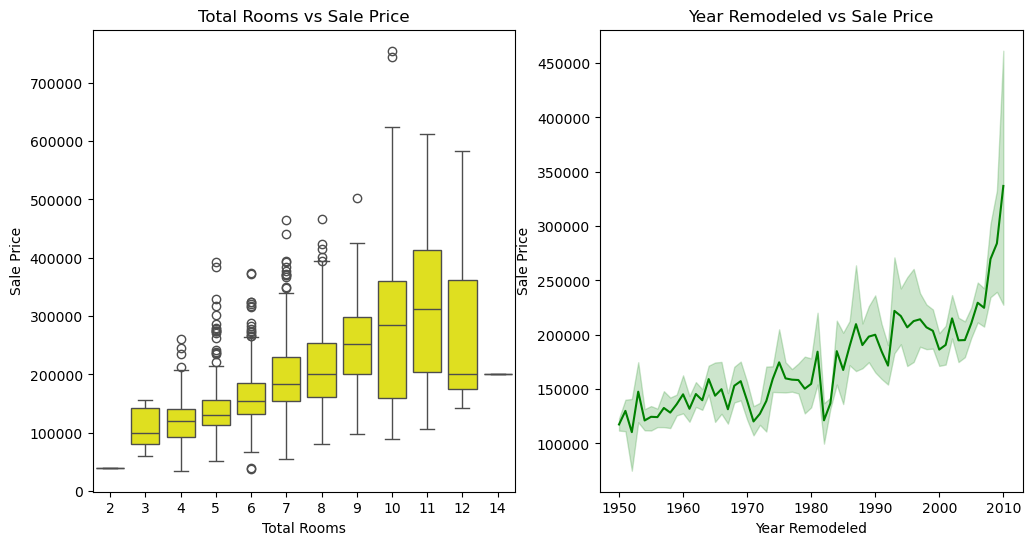

In [36]:
# Total Rooms Above Grade (excluding bathrooms) vs Sale Price

plt.figure(figsize=(12,6))

# Total Rooms Above Grade vs Sale Price
plt.subplot(1, 2, 1)
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=df, color='Yellow' )
plt.xlabel("Total Rooms")
plt.ylabel("Sale Price")
plt.title("Total Rooms vs Sale Price")


# Year Remodeled vs Sale Price
plt.subplot(1, 2, 2)
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=df, color='green')
plt.xlabel("Year Remodeled")
plt.ylabel("Sale Price")
plt.title("Year Remodeled vs Sale Price")

plt.show()


More rooms usually lead to higher sale prices, though some smaller homes still fetch a premium and recently remodeled houses generally sell for higher prices, highlighting the value of renovations.

### Skewness and kurtosis

In [39]:
print("SalePrice Skewness: %f" % df['SalePrice'].skew())
print("SalePrice Kurtosis: %f" % df['SalePrice'].kurt())

SalePrice Skewness: 1.882876
SalePrice Kurtosis: 6.536282


### Analyze numerical features

In [41]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nThe Numerical Columns Count: {len(numerical_cols)}")


The Numerical Columns Count: 35


In [42]:
df.to_csv("realestate_cleaned.csv", index=False)
print("✅ File saved successfully: realestate_cleaned.csv")

✅ File saved successfully: realestate_cleaned.csv


## Tasks: 4 
### 1. Univariate Analysis - Numeric Variables

Plot distributions for top 12 numerical features

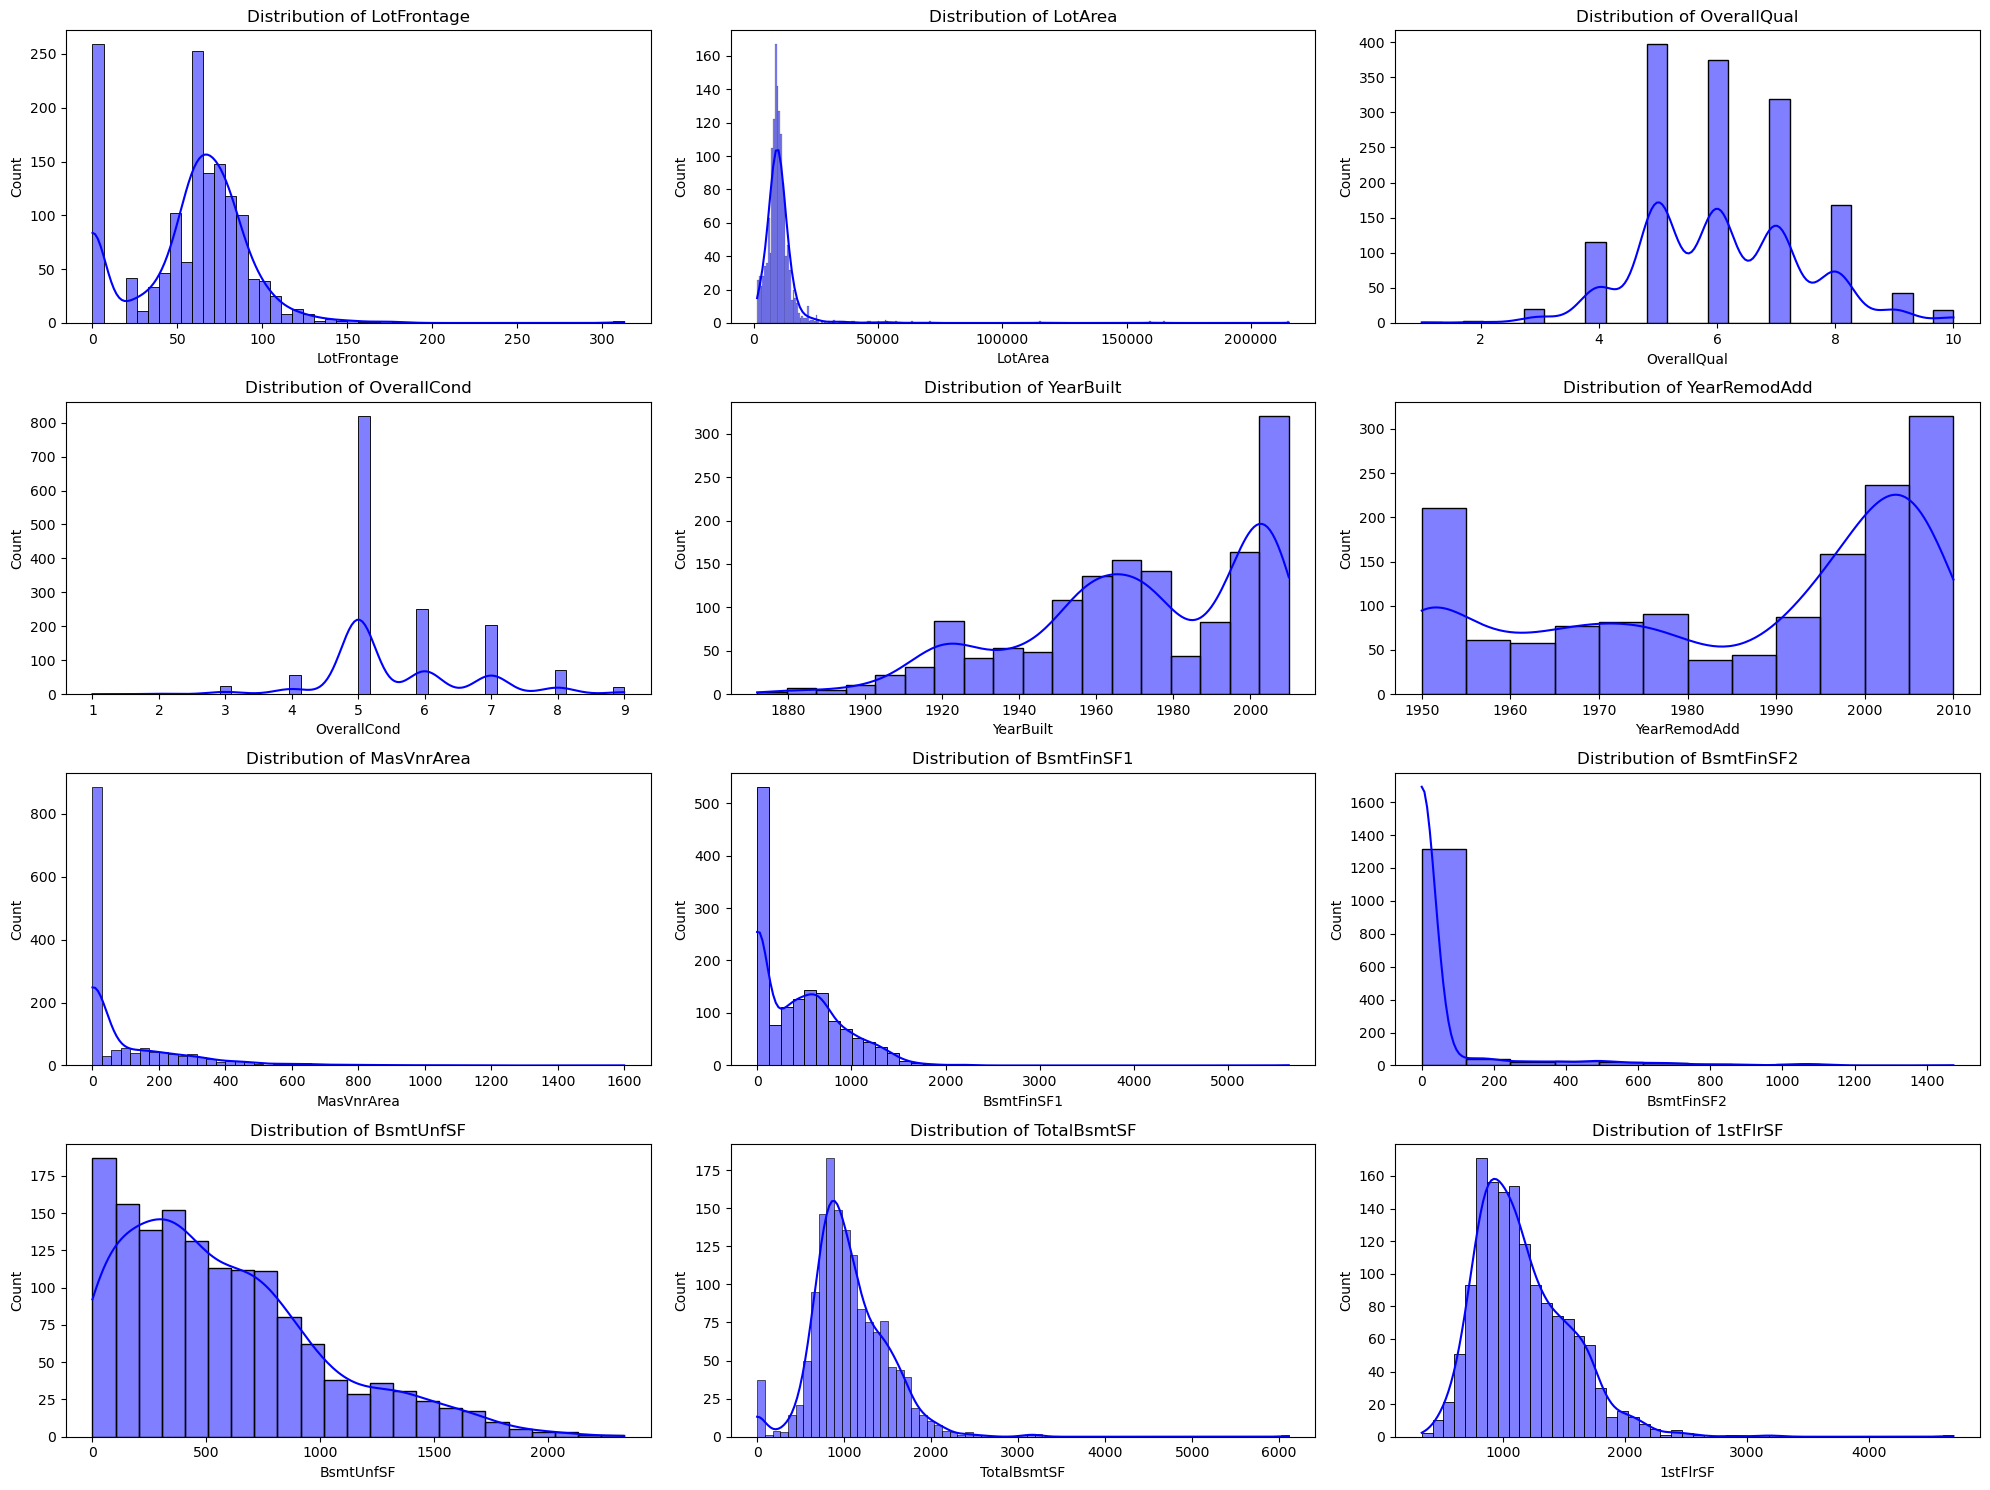

In [45]:
#Step-3 (Univariate Analysis)

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:12]):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, color='Blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Insights

LotFrontage: Distribution is strongly right-skewed with most values clustered between 60–80 ft. The long tail represents a few homes with unusually wide lots.

LotArea: Highly skewed with extreme outliers above 100,000 sqft, while most properties fall under 15,000 sqft. Larger areas may indicate luxury homes.

OverallQual: Nearly normal distribution peaking at 5–7, reflecting average to good quality. Strong potential predictor of SalePrice as it reflects material and finish quality.

OverallCond: Most homes are rated 5, showing average condition. Few extremes suggest that the majority of properties are reasonably maintained.

YearBuilt: More houses have been built in recent decades, particularly post-2000. A few pre-1940 houses remain. Newer homes generally command higher prices.

YearRemodAdd: Renovations peak in the 2000s, showing a modernizing trend. Few mid-century updates indicate renovation activity was lower then.

MasVnrArea: Most houses have zero veneer, but a right-skew indicates some with large veneer areas, often reflecting premium designs or finishes.

BsmtFinSF1: Right-skewed, with most basements <1000 sqft finished and some exceeding 2000 sqft. Zero values reflect unfinished basements. This feature often correlates with SalePrice.

BsmtFinSF2: Mostly zero, showing that a second finished basement area is rare. A few homes fall in the 400–600 sqft range.

BsmtUnfSF: Many homes have unfinished space under 1000 sqft, with a slightly right-skewed spread. Adds value as potential for future finishing.

TotalBsmtSF: Bimodal, peaking around 800–1000 sqft, with some basements over 2000 sqft. A strong feature for analyzing livable space.

1stFlrSF: Right-skewed with most homes between 1000–1500 sqft. Outliers represent very large homes. A critical predictor of overall home value.

### 2. Univariate Analysis - Categorical Variables

In [48]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nThe Categorical Columns Count: {len(categorical_cols)}")


The Categorical Columns Count: 44


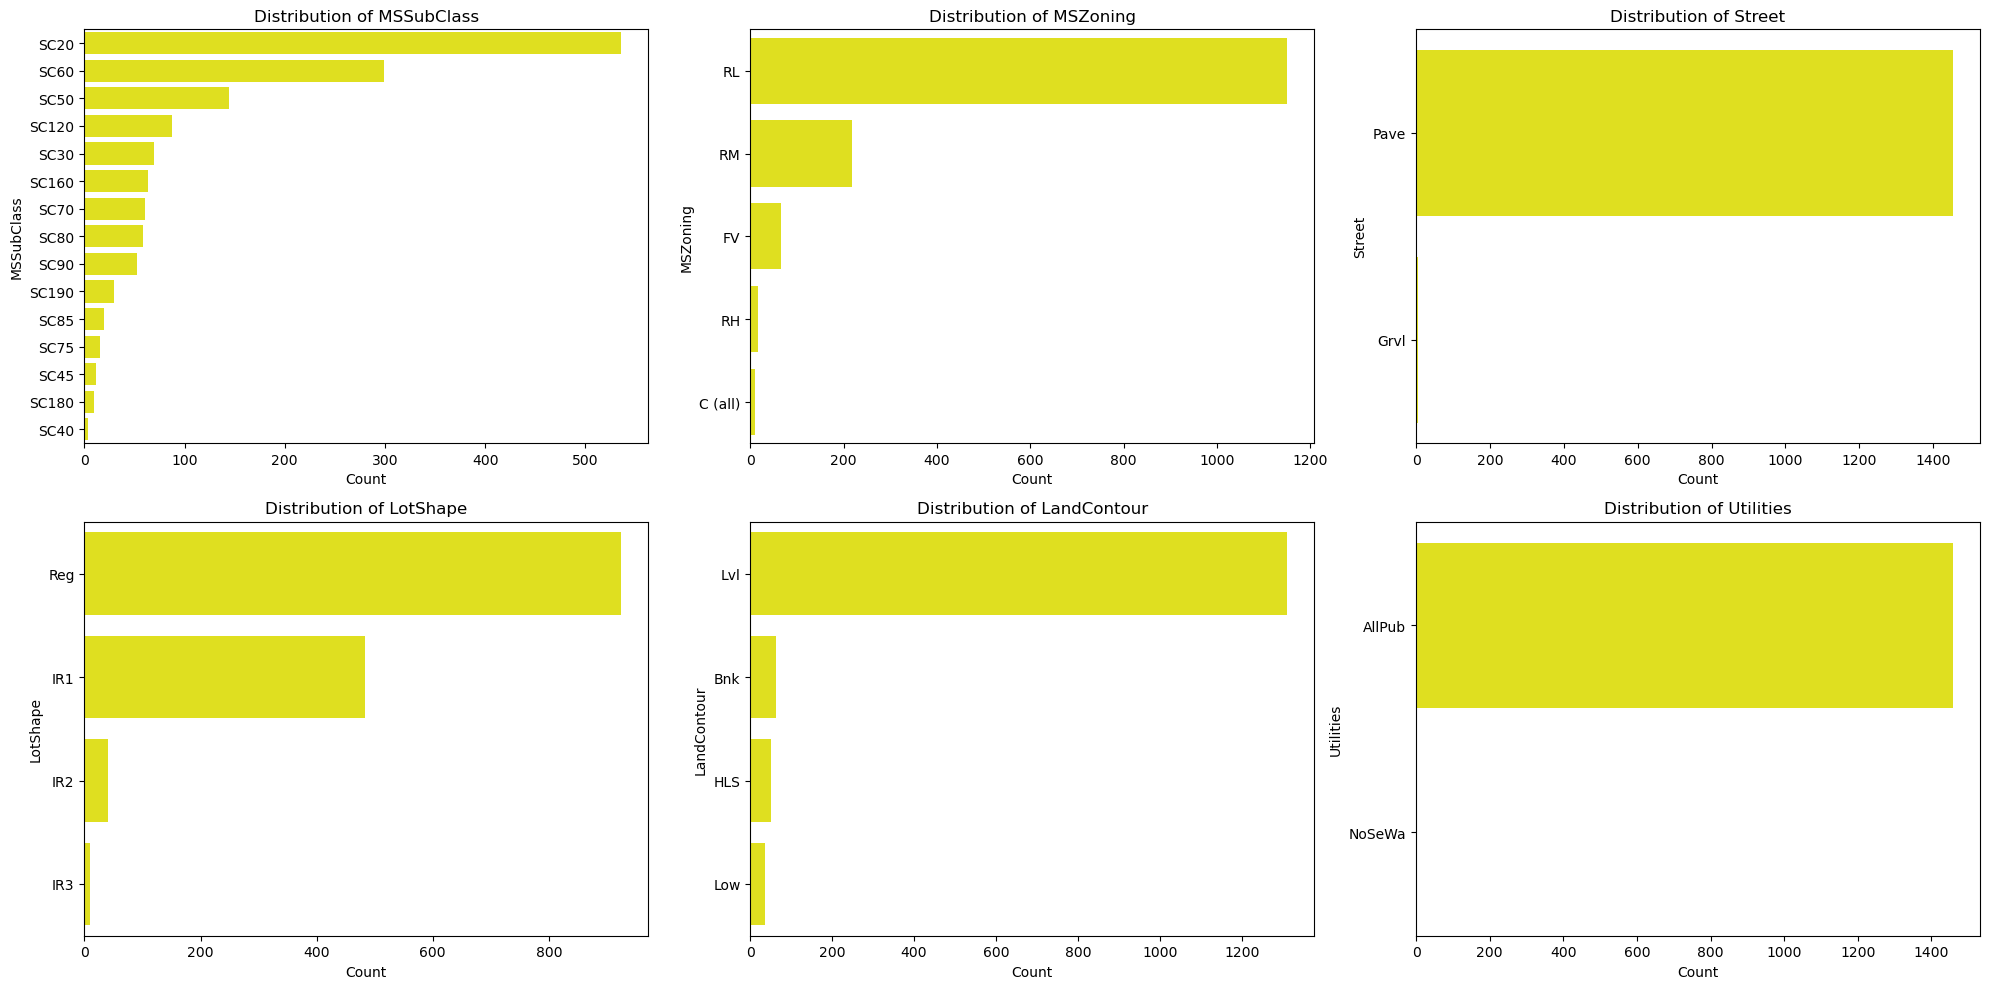

In [49]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols[:6]):
    plt.subplot(2, 3, i+1)
    sns.countplot(y=df[col], color="Yellow", order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
plt.tight_layout()
plt.show()

### Insights

MSSubClass: Most frequent class is 20 (1-story homes built after 1946), followed by 60 (2-story 1946+) and 50 (1.5-story finished). Older or unusual classes (e.g., SC45, SC180) are less common. This feature indirectly captures home type and construction age, making it a strong predictor of structure and price.

MSZoning: RL (Residential Low Density) dominates the dataset, with RM (Residential Medium Density) as the second most common. Other zones such as FV, RH, and commercial categories are rare. Zoning is important for distinguishing land use and market value.

Street: Vast majority of properties are on paved roads, while very few are on gravel roads. Although the imbalance limits predictive power, street type can slightly influence accessibility and property value.

LotShape: Most lots are regular (Reg), with a fair number being slightly irregular (IR1). Highly irregular shapes (IR2, IR3) are rare. Lot shape may impact land usability and building design flexibility.

LandContour: Level (Lvl) lots are overwhelmingly dominant. Other contours like Bnk (Banked), HLS (Hillside), and Low appear occasionally. Contour can affect drainage, construction difficulty, and overall desirability.

Utilities: Nearly all properties have full public utilities (AllPub). Rare cases lack sewer/water (NoSeWa), making this feature very low in variance and less useful unless specifically analyzing remote or rural properties.

### 3. Multivariate Analysis

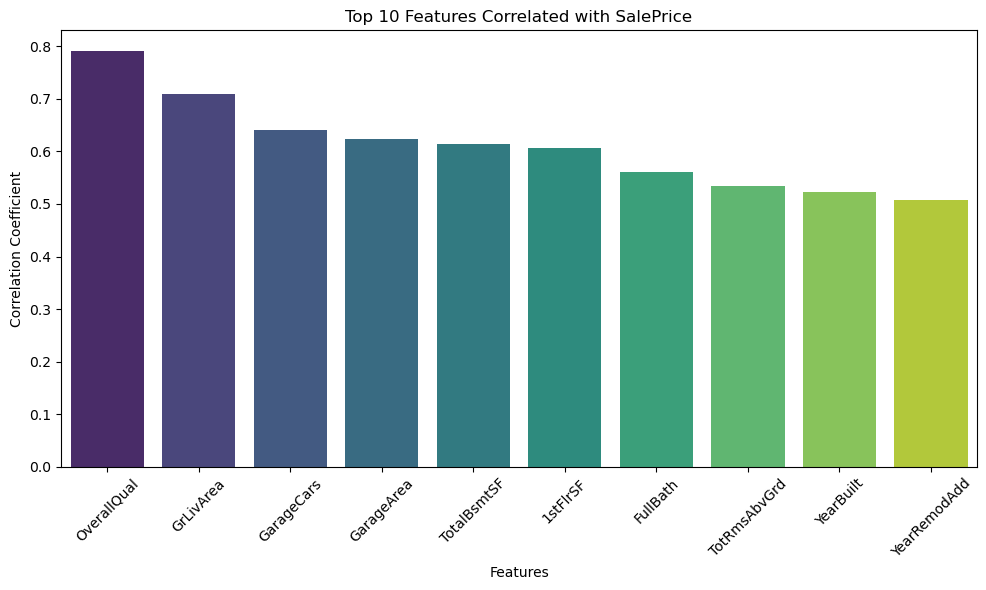

In [52]:
# Calculate correlation with SalePrice
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.index, y=top_corr.values, hue=top_corr.index, palette='viridis', legend=False)
plt.title('Top 10 Features Correlated with SalePrice')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### Insights
OverallQual shows the strongest positive correlation, making house quality the most influential factor in pricing.

GrLivArea ranks second, as larger above-ground living space directly increases sale price.

GarageCars and GarageArea also correlate strongly, highlighting the importance of garage capacity and size.

TotalBsmtSF has a notable positive impact, with larger basements linked to higher prices.

The top 5 features (OverallQual through TotalBsmtSF) are the most powerful drivers of sale price.

Correlation strength gradually declines from OverallQual to YearRemodAdd, reflecting decreasing influence.

YearBuilt and YearRemodAdd, while still positively correlated, show weaker effects compared to quality and size-related features.

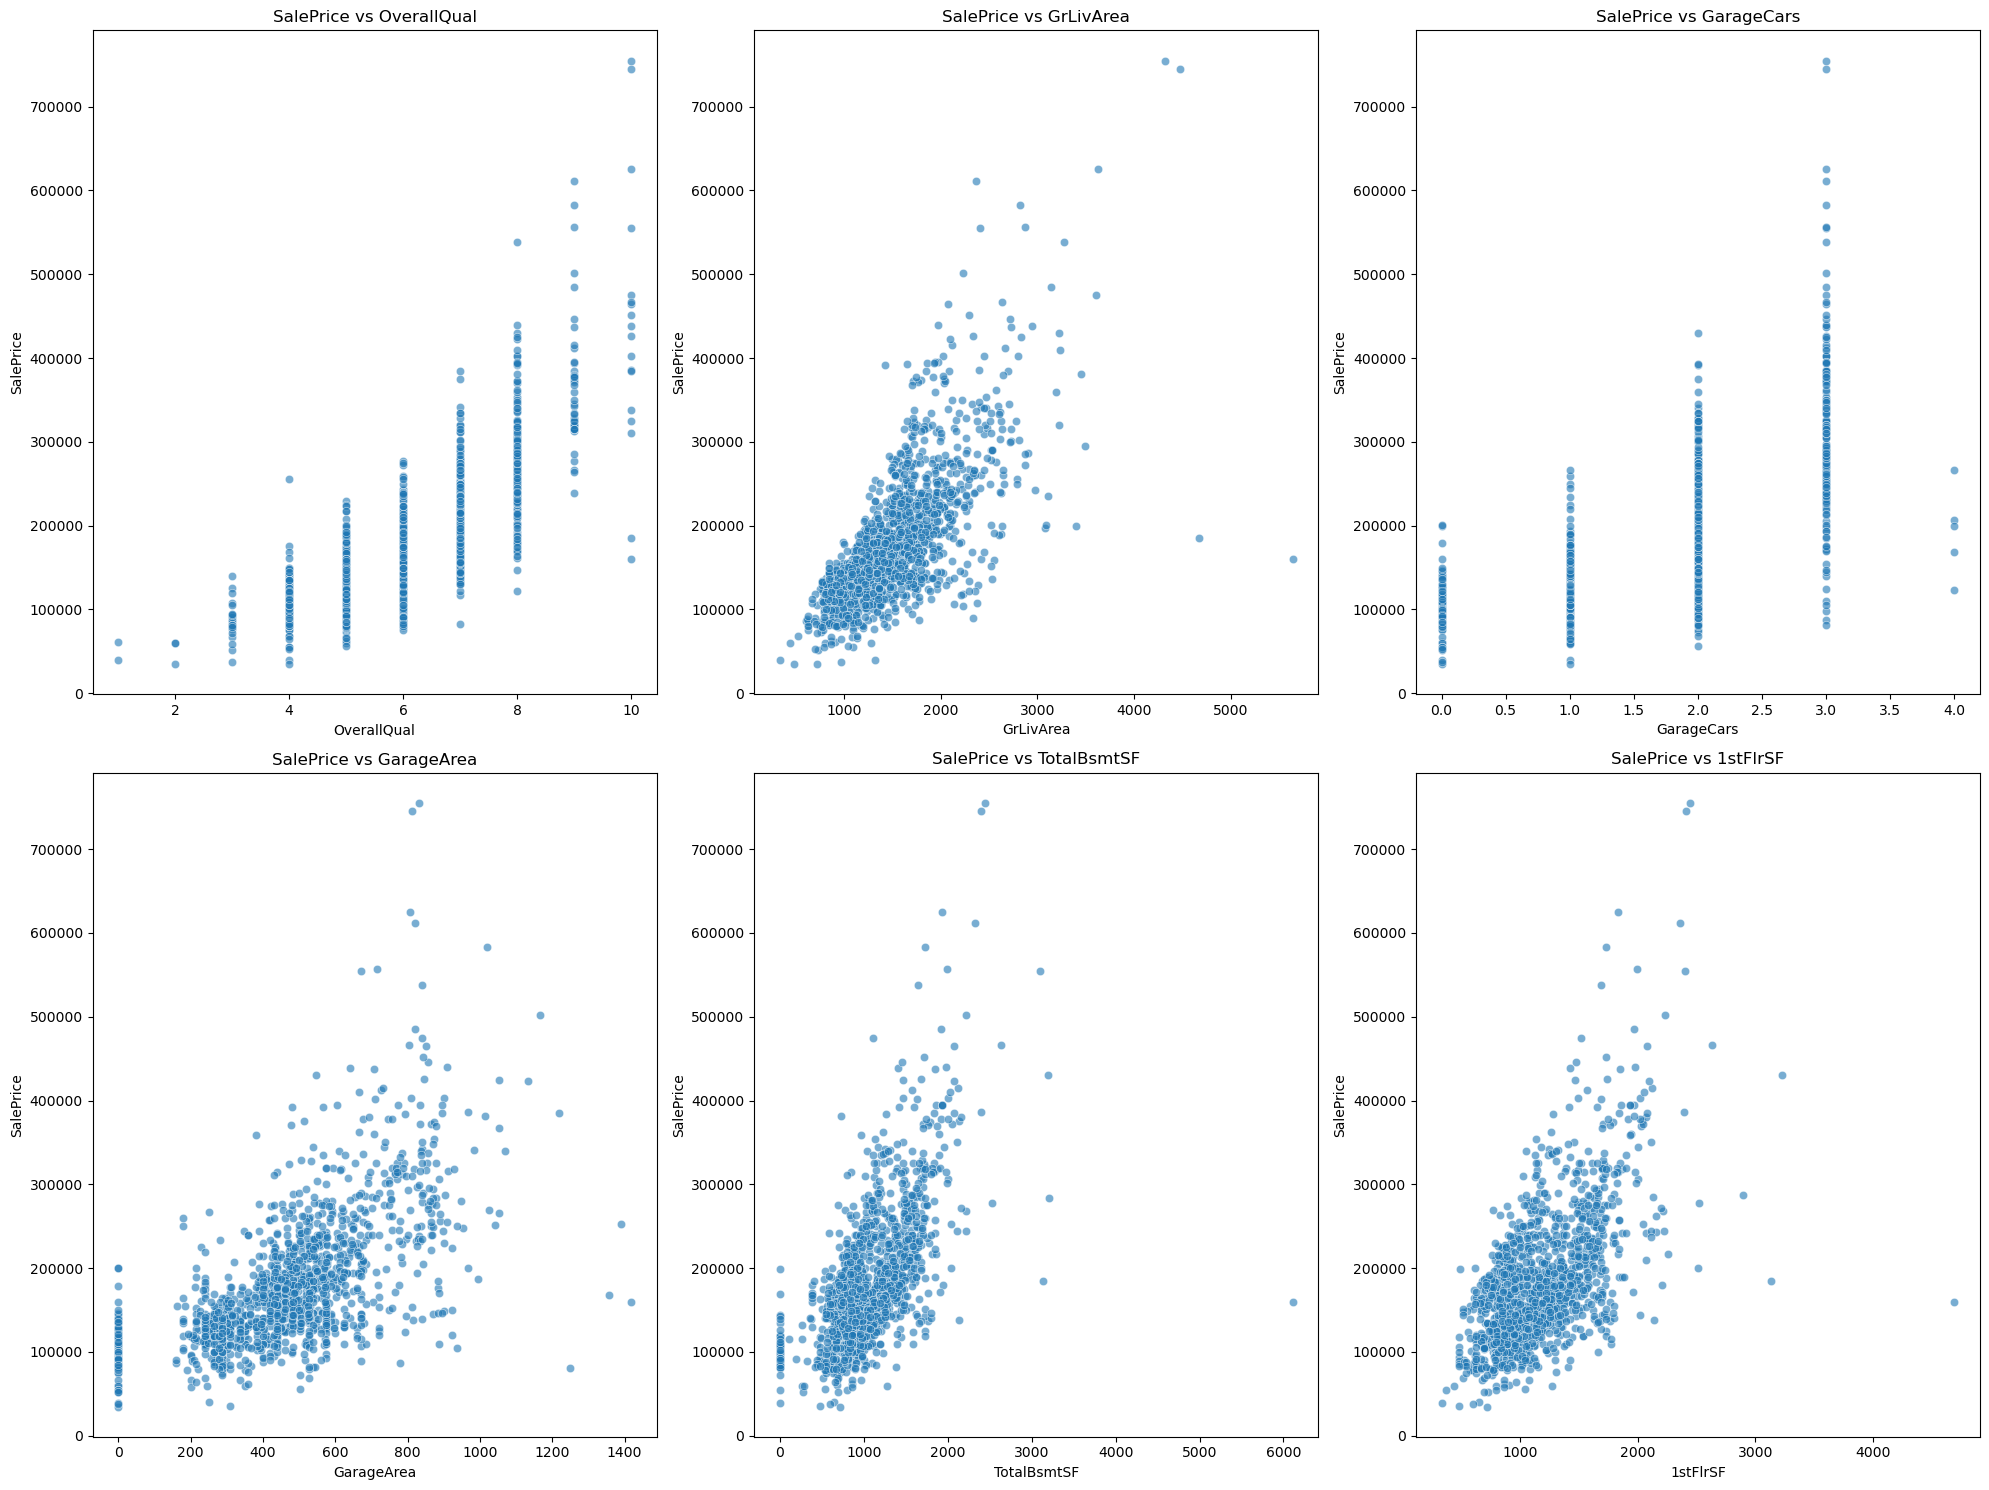

In [54]:
# Scatter plots of top correlated features with SalePrice

top_features = top_corr.index[:6]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['SalePrice'], alpha=0.6)
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

Insights
1. Positive correlation between GrLivArea and SalePrice:
As the ground living area increases, the sale price tends to increase.
2. Positive correlation between TotalBsmtSF and SalePrice:
Larger total basement square footage is generally associated with higher sale prices.
3. Discrete SalePrice jumps with GarageCars:
SalePrice tends to form distinct levels based on the number of cars the garage can hold (0, 1, 2, 3, 4).
4. Positive correlation between 1stFlrSF and SalePrice:
Larger first-floor square footage generally corresponds to higher sale prices.
5. Positive correlation between GarageArea and SalePrice with potential saturation:
While larger garage area tends to increase sale price, the effect might diminish at very large garage sizes.

<Figure size 700x500 with 0 Axes>

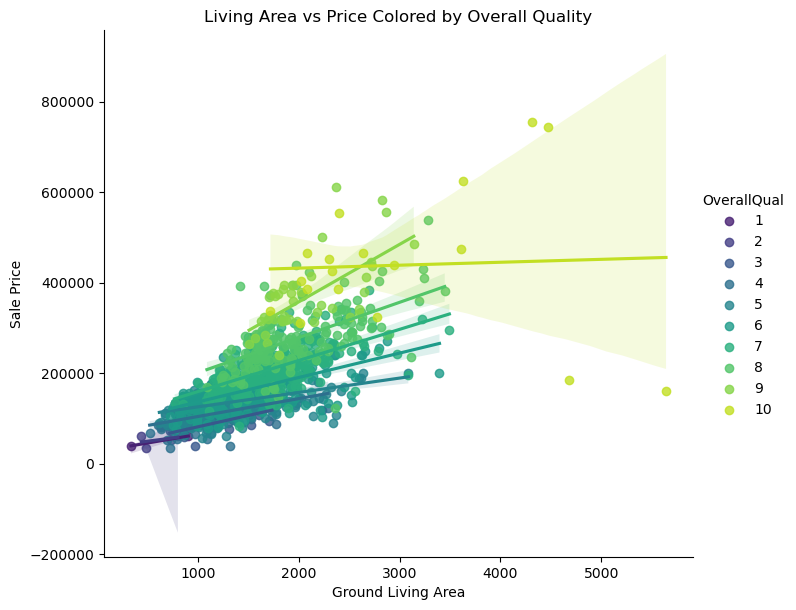

In [56]:
# Price per SqFt by Quality

plt.figure(figsize=(7, 5))
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual', 
           data=df, palette='viridis', height=6, aspect=1.2)
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Living Area vs Price Colored by Overall Quality')
plt.show()

### Insights
GrLivArea (Above Ground Living Area) vs SalePrice with OverallQual Coloring
Strong positive correlation: As GrLivArea increases, SalePrice generally increases too.
Lighter colors (high OverallQual) cluster at higher prices.
Darker colors (low OverallQual) mostly stay at lower prices, even for bigger houses.
A small house with OverallQual = 9 or 10 can cost more than a big house with OverallQual = 3 or 4.
A few very large homes (>4000 sqft) with lower-than-expected prices might be outliers or custom builds.
GrLivArea and OverallQual together are strong predictors of price.

In [58]:
# Create PriceSegment if not already created

if 'PriceSegment' not in df.columns:
    df['PriceSegment'] = pd.qcut(df['SalePrice'], q=4, 
                                        labels=['Low', 'Medium', 'High', 'Premium'])

# Cross-tabulation Analysis for Two Categorical Variables
if 'OverallQual' in df.columns:
    cross_tab = pd.crosstab(df['PriceSegment'], df['OverallQual'], 
                           normalize='index')

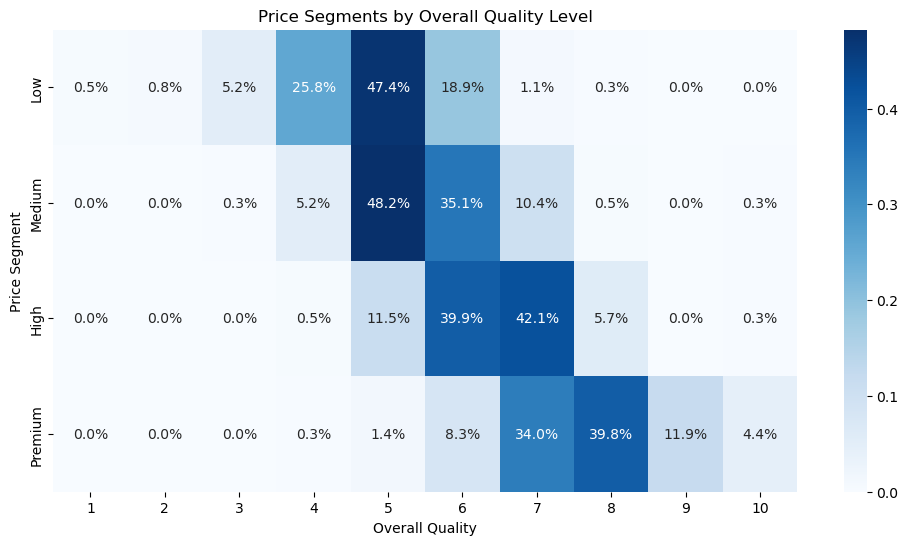

In [59]:
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='.1%', cmap='Blues')
plt.title('Price Segments by Overall Quality Level')
plt.ylabel('Price Segment')
plt.xlabel('Overall Quality')
plt.show()

### Insights
#Heatmap Analysis: Price Segments vs Overall Quality
#Most houses fall in OverallQual = 5 or 6, forming the core of the dataset.
#These are mostly in Low and Medium price segments.
#47.4% of low-price homes are quality 5.
#Very few low-price homes have quality >7.
#OverallQual 8 and 9 dominate the Premium segment (39.8% and 11.9%).
#These homes rarely appear in low/medium price bands.
#It’s spread across Medium, High, and Premium, showing it's a transition quality.
#42.1% of High-price homes are Quality 7.
#39.9% of high-price homes are Quality 6 – the minimum level reaching into high price.

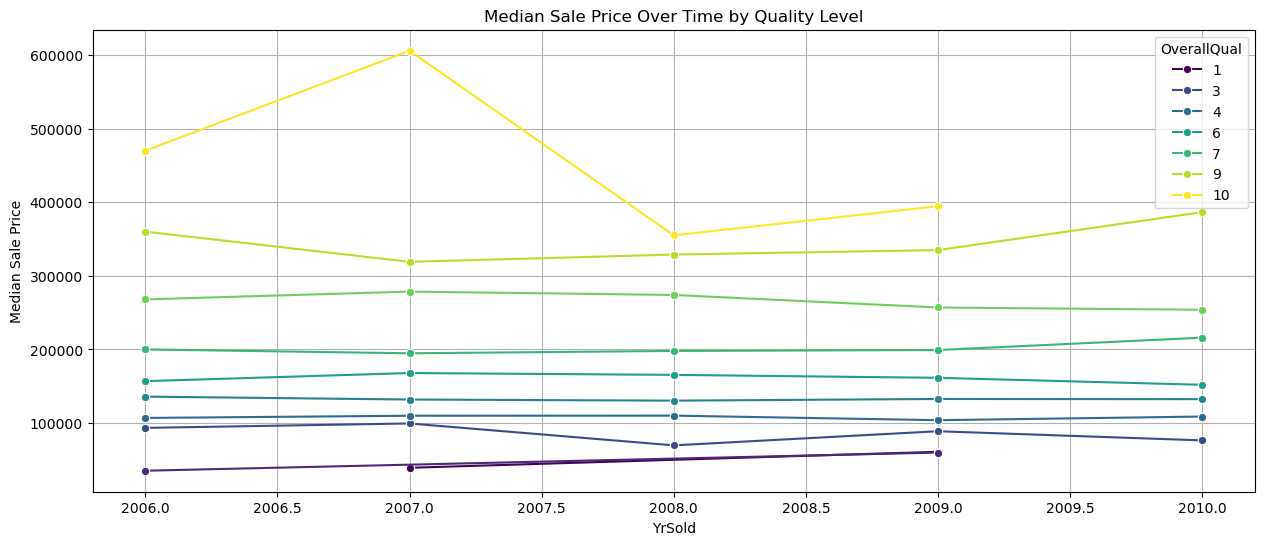

In [61]:
# Time-based Bivariate Analysis

plt.figure(figsize=(15, 6))
sns.lineplot(x='YrSold', y='SalePrice', hue='OverallQual', 
             data=df, estimator='median', errorbar=None,
             palette='viridis', marker='o')
plt.title('Median Sale Price Over Time by Quality Level')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.show()

## Tasks: 5
### Feature Engineering

Create new features that capture relevant information for pricing analysis.

In [64]:
df['Price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['Is_Luxury_Home'] = (df['SalePrice'] > df['SalePrice'].quantile(0.90)).astype(int)

In [65]:
# Amenity flags
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

### Display new features

In [67]:
display(df[['Price_per_sqft', 'TotalSF', 'TotalBath', 'HouseAge', 'RemodAge', 'Is_Luxury_Home']].head())

,Price_per_sqft,TotalSF,TotalBath,HouseAge,RemodAge,Is_Luxury_Home
0,121.929825,2566,3.5,5,5,0
1,143.819334,2524,2.5,31,31,0
2,125.139978,2706,3.5,7,6,0
3,81.537566,2473,2.0,91,36,0
4,113.739763,3343,3.5,8,8,0


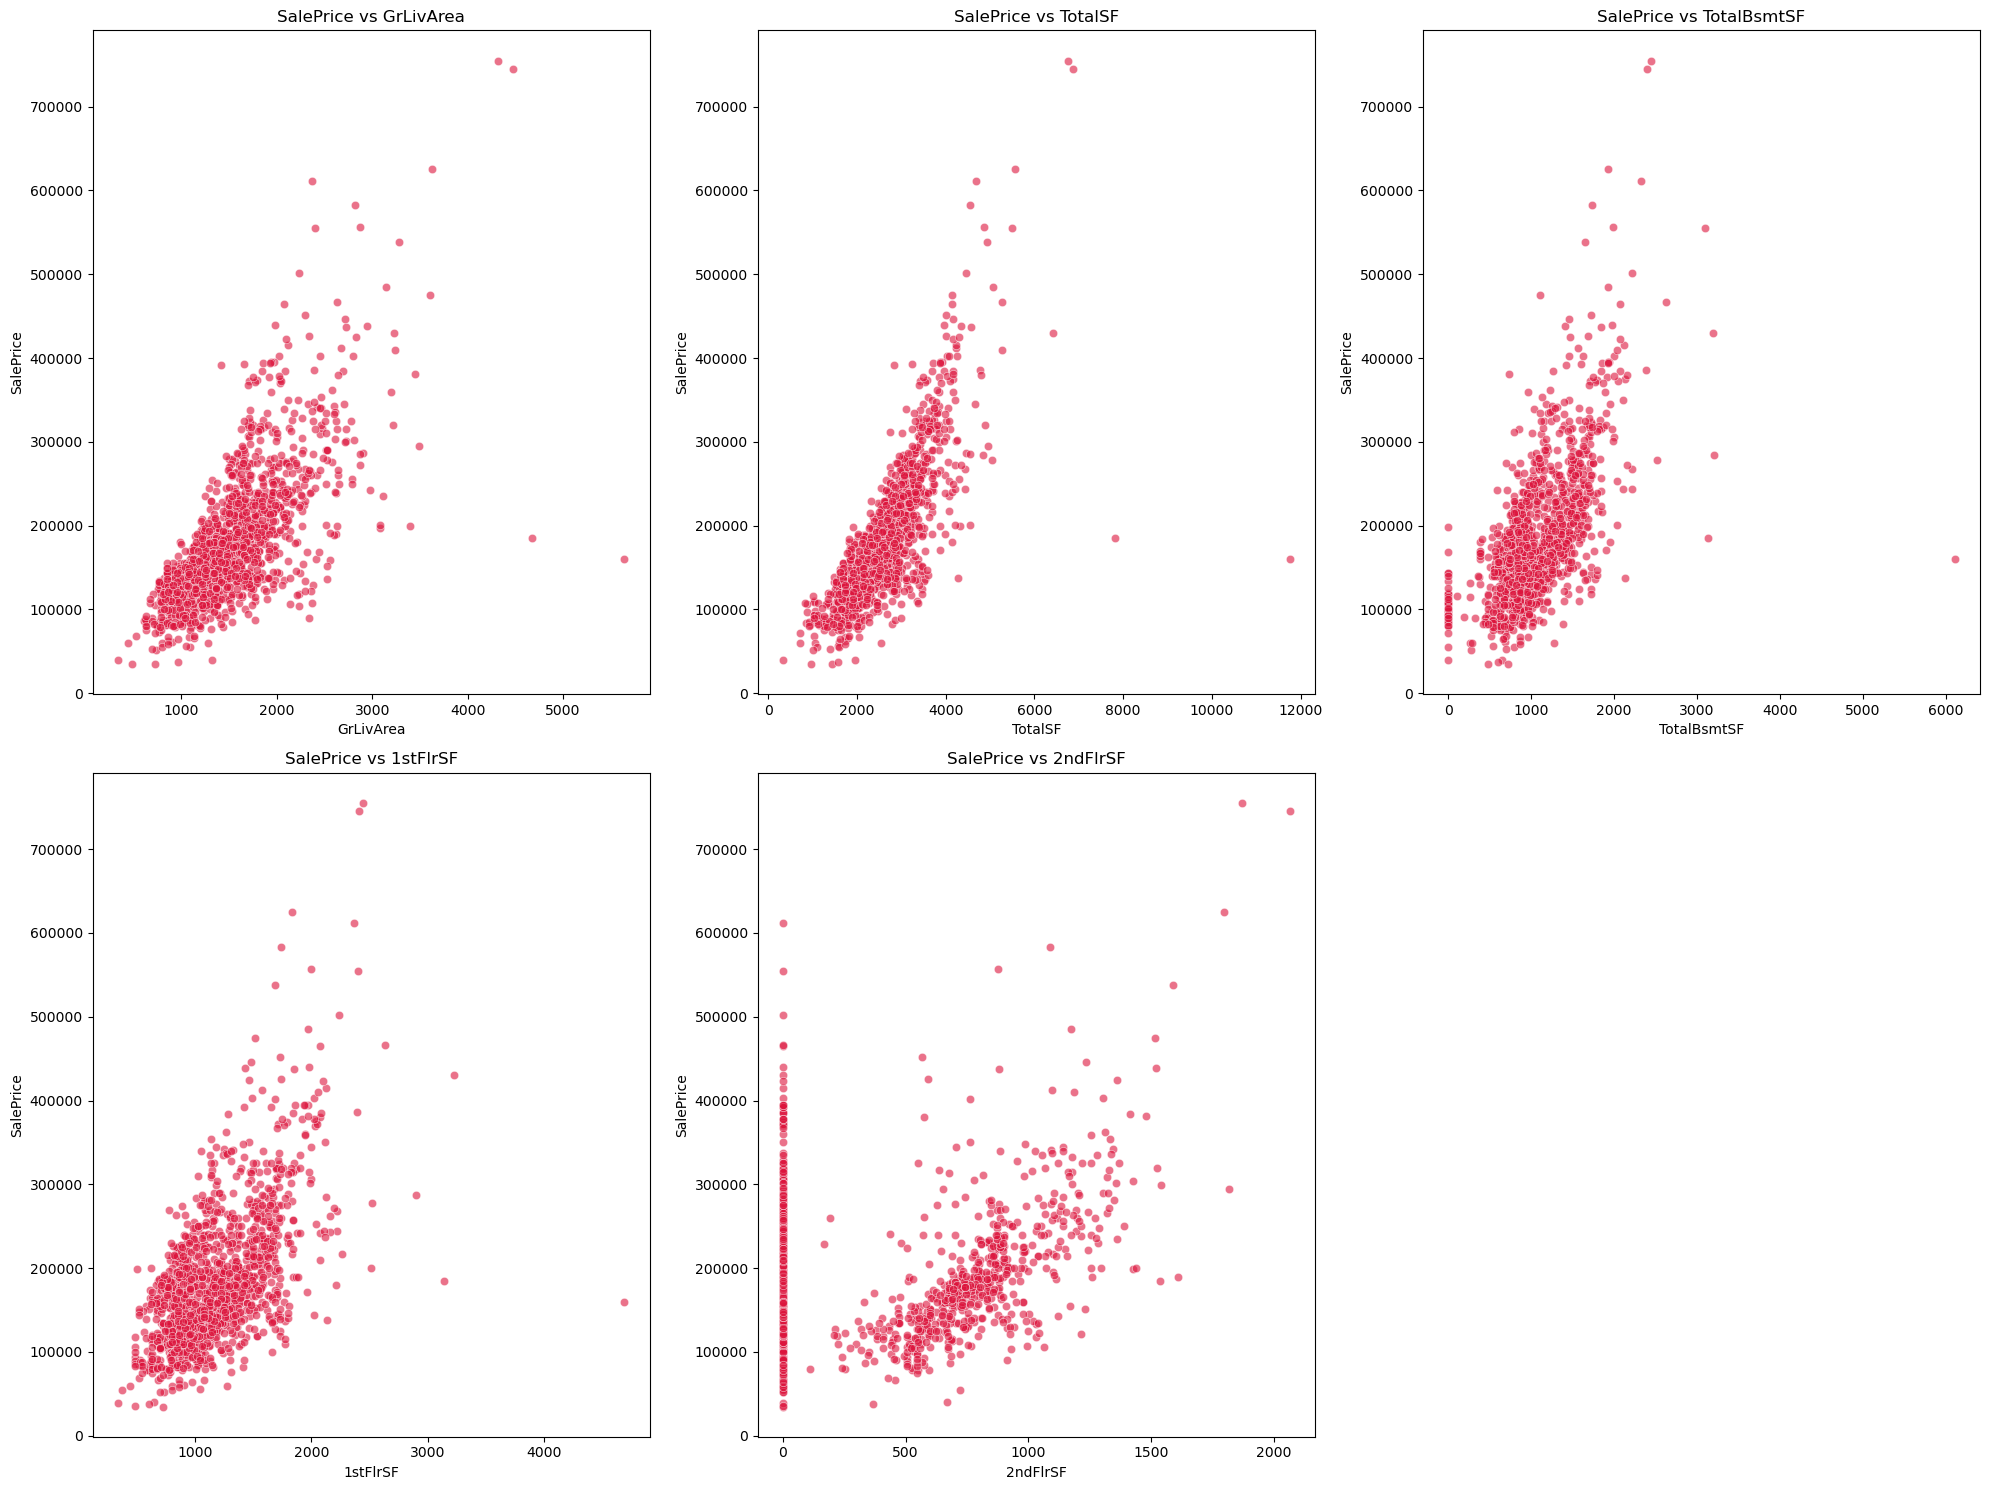

In [68]:
# Size impact analysis
size_features = ['GrLivArea', 'TotalSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(size_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['SalePrice'], alpha=0.6, color="crimson")
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

Insights

GrLivArea shows a strong positive linear relationship with SalePrice — larger above-ground living area leads to significantly higher prices.

TotalBsmtSF also correlates positively, though with potential non-linearity, as the spread of prices widens at higher basement sizes.

GarageCars creates distinct price clusters, with clear jumps in median SalePrice as garage capacity increases (1, 2, or 3 cars).

1stFlrSF exhibits a clear positive correlation, where bigger first-floor space is linked to higher property values.

GarageArea shows positive correlation but with diminishing returns — beyond a certain size, additional garage space contributes less to price growth.

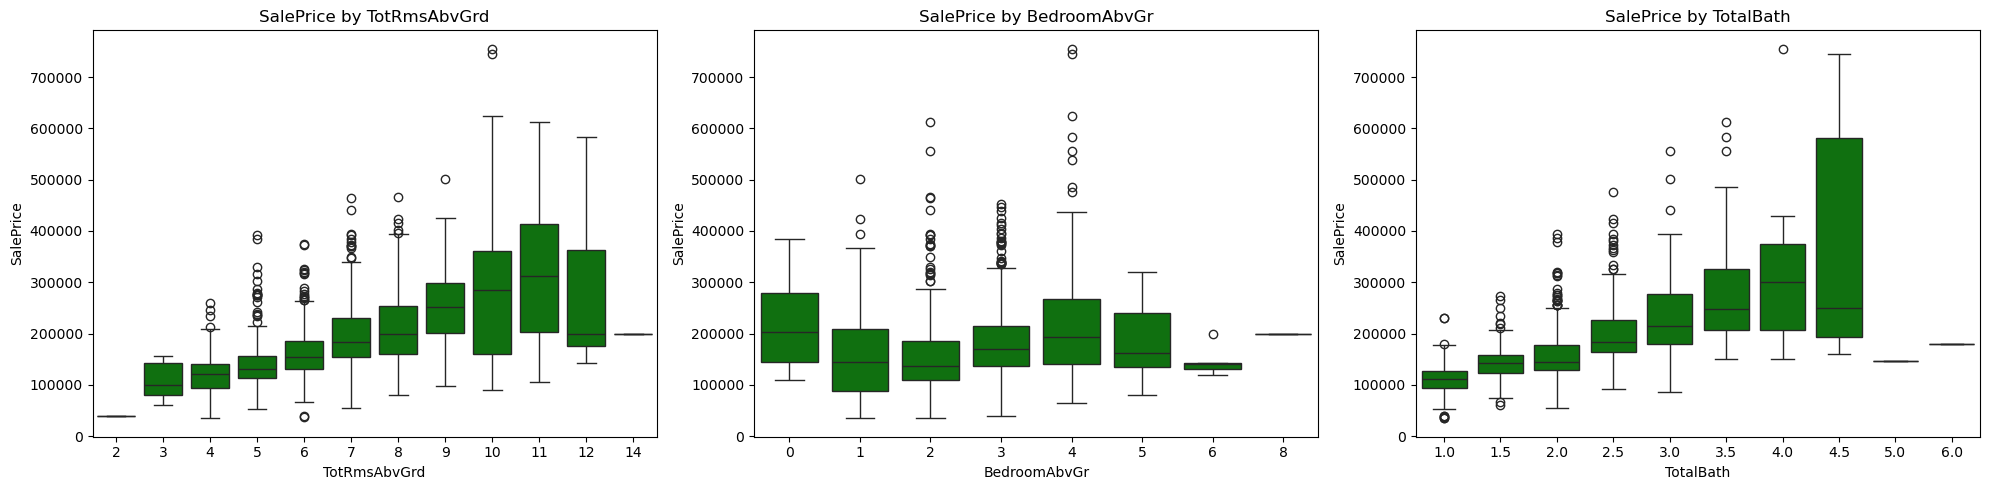

In [70]:
# Room and bathroom analysis

room_features = ['TotRmsAbvGrd', 'BedroomAbvGr', 'TotalBath']

plt.figure(figsize=(20, 5))
for i, feature in enumerate(room_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[feature], y=df['SalePrice'], color="green")
    plt.title(f'SalePrice by {feature}')
plt.tight_layout()
plt.show()

### Insights on Sale Price Trends
The analysis reveals that property values generally rise as the number of above-ground bedrooms increases, showing a positive relationship between bedrooms and SalePrice. A similar trend is observed with full bathrooms, where houses with more bathrooms tend to command higher prices. When considering total bathrooms (full and half combined), the association with SalePrice becomes even stronger, making it the most influential factor among the three.
Interestingly, as the number of bedrooms and bathrooms grows, the variation in SalePrice also becomes wider, suggesting that larger homes fall into a broader price range depending on other features. Additionally, across all categories, there are noticeable outliers—properties that are sold at prices significantly above or below the typical range for their bedroom and bathroom counts.

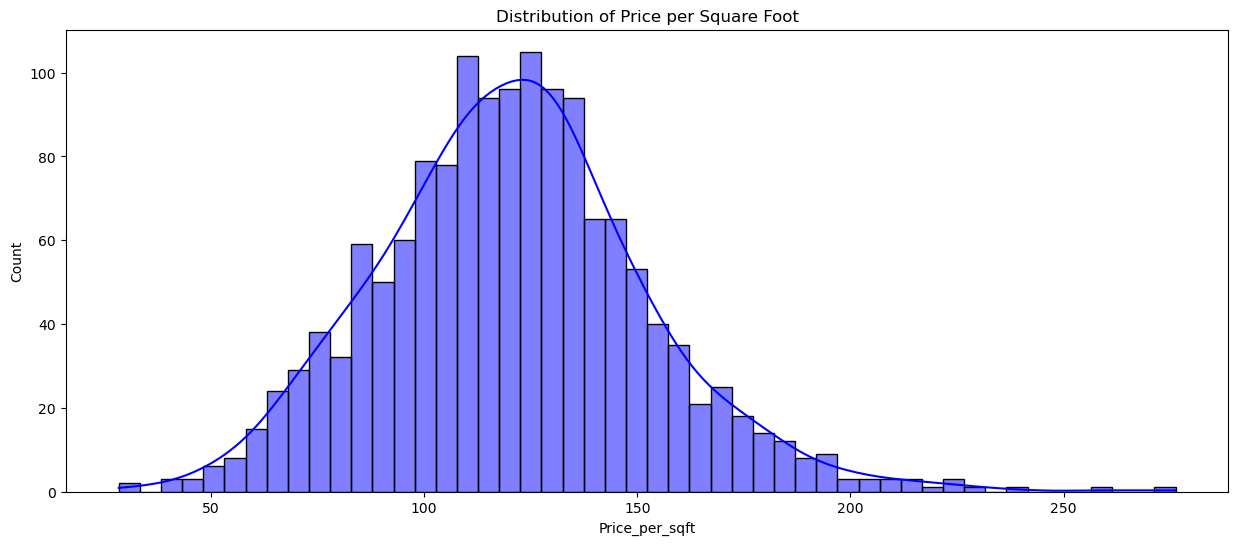

In [72]:
# Price per sqft analysis

plt.figure(figsize=(15, 6))
sns.histplot(df['Price_per_sqft'], kde=True, bins=50, color="Blue")
plt.title('Distribution of Price per Square Foot')
plt.show()

### Insights on Price per Square Foot

The distribution of price per square foot in the dataset resembles a normal curve, indicating that most properties are clustered around a central value. In fact, the majority of houses fall in the range of 100–150 per sqft, which represents the typical market level.
While the overall shape is close to bell-shaped, the distribution shows a slight right skew, driven by a small number of houses priced much higher per square foot. On the other end, extremely low-priced properties are also relatively rare, as suggested by the thin tails of the distribution.
Overall, this analysis highlights both the central tendency and the spread of housing prices per square foot, giving a clear picture of the market’s typical pricing patterns and the less frequent extreme cases.

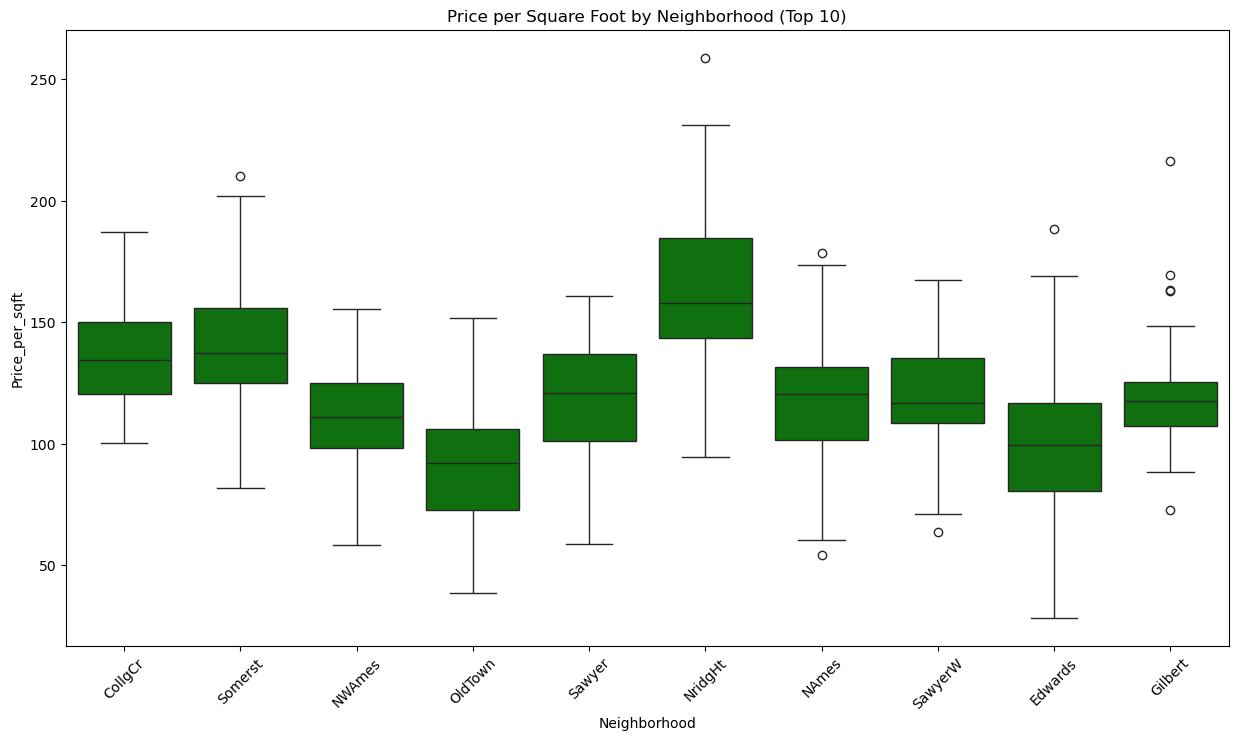

In [74]:
# Price per sqft by neighborhood

top_neighborhoods = df['Neighborhood'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='Price_per_sqft', data=df[df['Neighborhood'].isin(top_neighborhoods)], color="Green")
plt.title('Price per Square Foot by Neighborhood (Top 10)')
plt.xticks(rotation=45)
plt.show()

### Insights on Neighborhood Price per Square Foot

The analysis highlights that different neighborhoods have their own distinct pricing patterns per square foot. Among the top 10 areas, NridgHt stands out with the highest values, both in terms of median price and overall spread, while StoneBr also shows consistently higher pricing levels. In contrast, OldTown tends to fall on the lower end of the spectrum, reflecting its comparatively modest property values.
Variability in prices differs across neighborhoods as well. For instance, SawyerW displays a wider spread, suggesting less consistency in pricing, whereas ClearCr appears more stable. Additionally, outliers are visible across almost all neighborhoods, pointing to properties that sell at significantly higher or lower rates than the norm.
Overall, this neighborhood-level comparison provides clear insights into which locations command premium prices and which are relatively more affordable, while also revealing the degree of price consistency within each area.

## Tasks: 6
### Market Trends and Historical Pricing

In [77]:
print(df['YrSold'].head())

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64


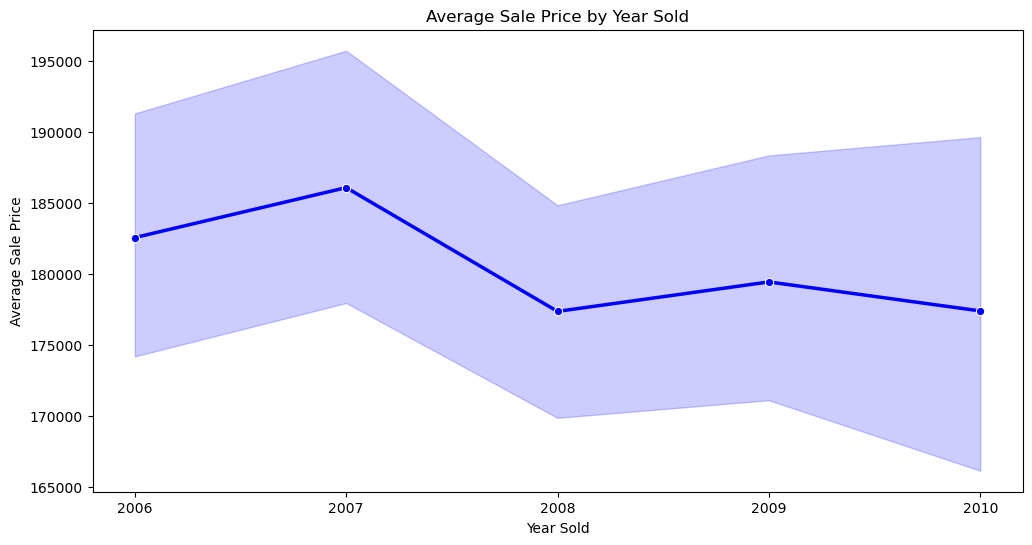

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=df, linewidth=2.5, color="Blue", marker="o")
plt.title('Average Sale Price by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.xticks(df['YrSold'].unique())
plt.show()

### Insights on Average Sale Price by Year Sold

The trend of average sale prices over time reveals clear market shifts. Prices reached their highest point in 2007, before experiencing a sharp decline around 2008–2009, which aligns with the period of the global financial crisis. This downturn is particularly evident with the lowest values observed in 2008 and 2010.
Beyond these sharp changes, the data also shows fluctuations throughout 2006–2010, reflecting ongoing market variability. Overall, the pattern captures how external economic factors significantly influenced housing prices during this period.

## Outlier Detection

In [81]:
z_scores = np.abs(stats.zscore(df['SalePrice']))
outliers = df[z_scores > 3]

print(f"Number of outliers detected in SalePrice: {len(outliers)}")

Number of outliers detected in SalePrice: 22


## Visualize outliers

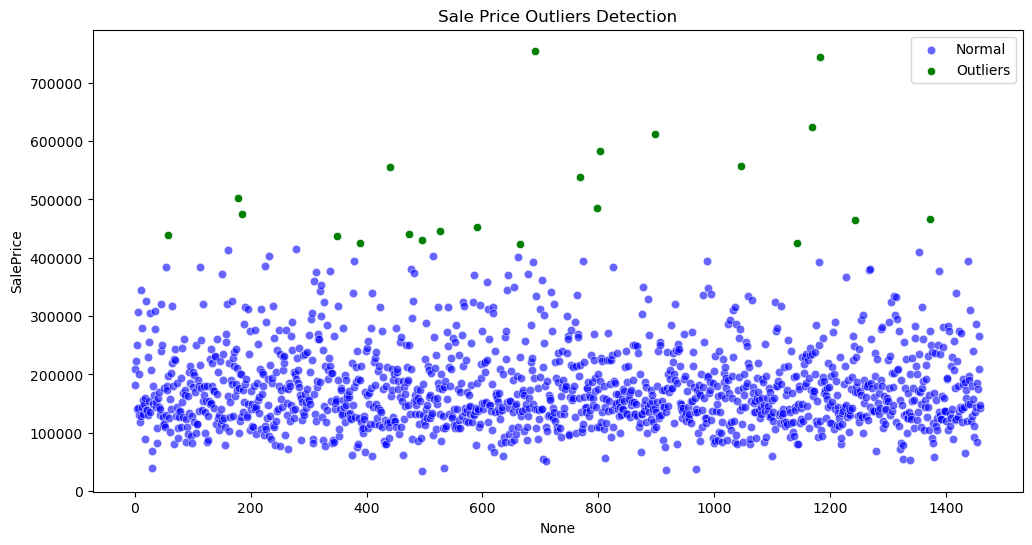

In [83]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y='SalePrice', data=df, color='Blue', alpha=0.6, label='Normal')
sns.scatterplot(x=outliers.index, y='SalePrice', data=outliers, color='Green', label='Outliers')
plt.title('Sale Price Outliers Detection')
plt.legend()
plt.show()

### Insights – SalePrice Outliers Detection

1. Most houses fall under the lower price bracket, with SalePrices concentrated below ~$300,000.

2. A few properties with SalePrices exceeding $400,000 clearly stand out as outliers.

3. These high-value outliers are rare compared to the bulk of typical observations.

4. Outliers don’t follow any index-based pattern, meaning they are not tied to data entry order.

5. The visualization makes it easy to distinguish normal property prices from exceptionally high ones.

## Tasks: 7
### Customer Preferences and Amenities

In [86]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

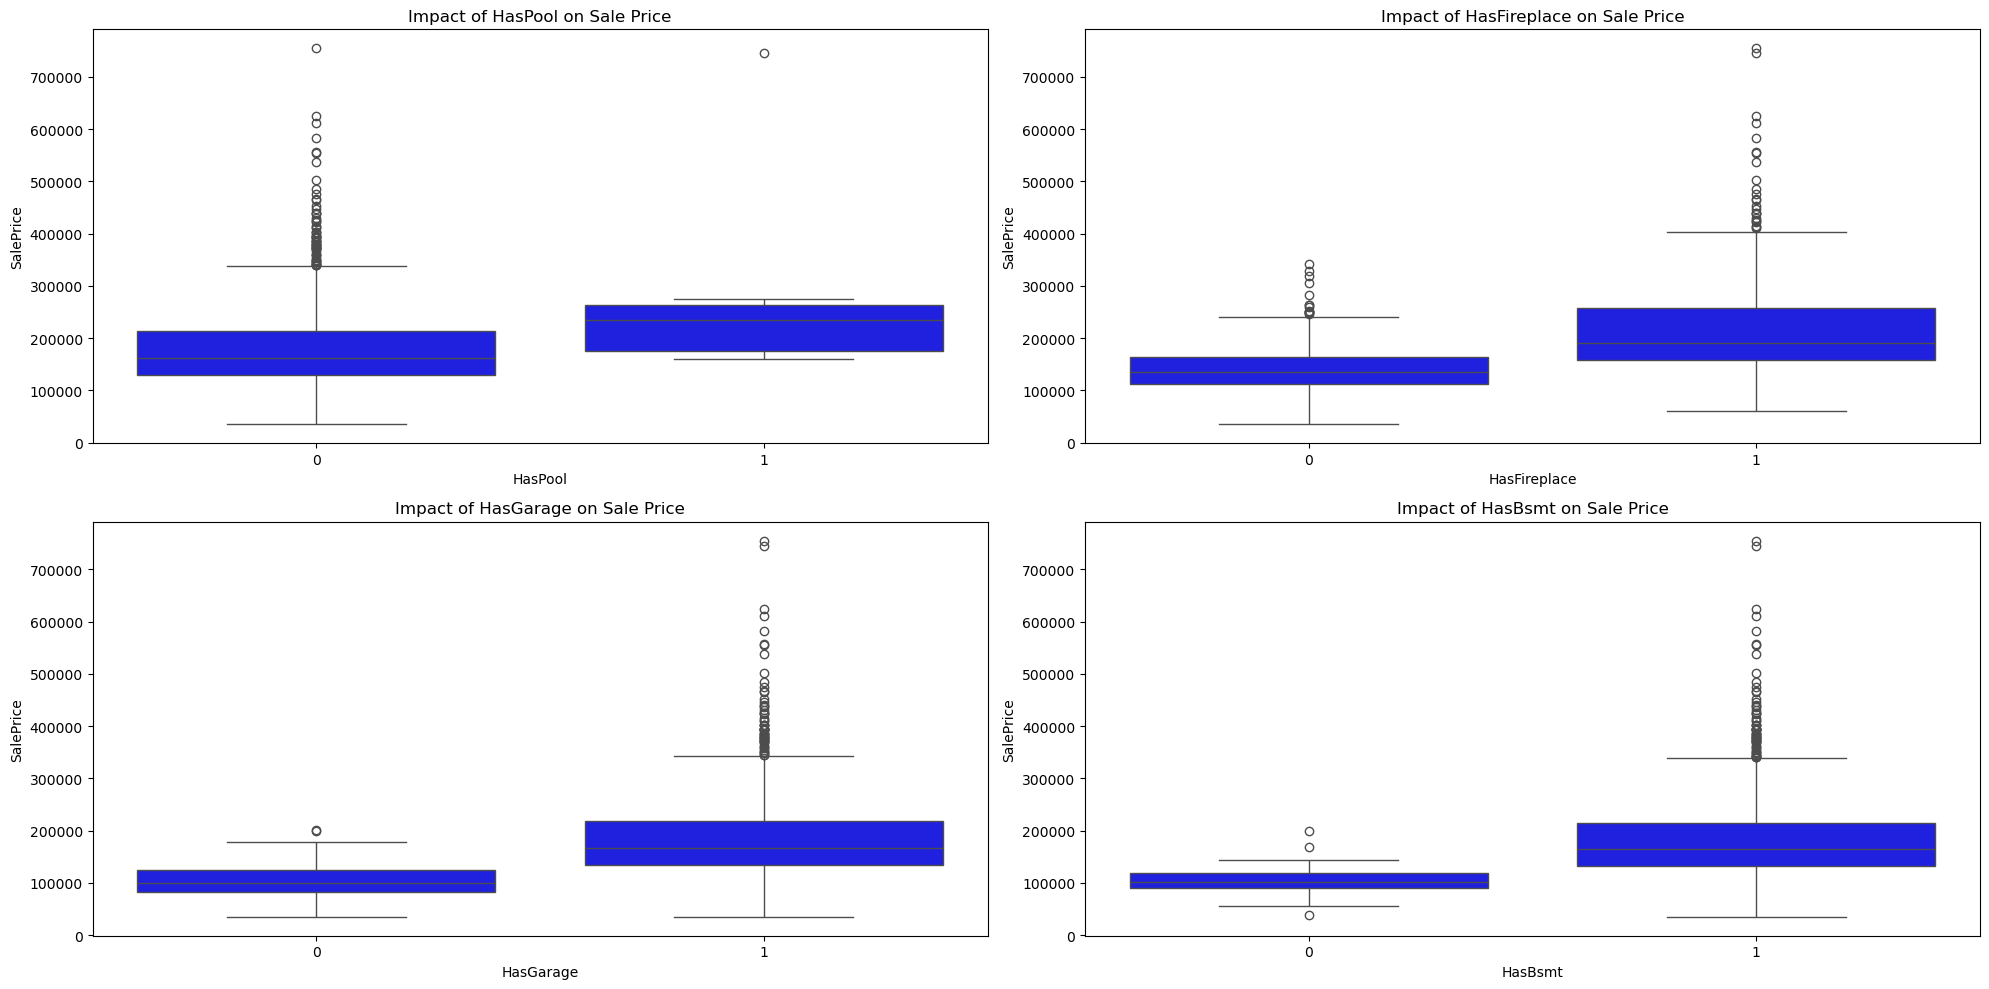

In [87]:
# Amenities impact
amenities = ['HasPool', 'HasFireplace', 'HasGarage', 'HasBsmt']

plt.figure(figsize=(20, 10))
for i, amenity in enumerate(amenities):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=amenity, y='SalePrice', data=df, color="Blue")
    plt.title(f'Impact of {amenity} on Sale Price')
plt.tight_layout()
plt.show()

### Insights – Effect of Bathrooms, Fireplaces, and Garages on Sale Price

1. Full Bathrooms add the most value – Homes with more full baths consistently show higher median sale prices, making them a strong driver of value.

2. Half Bathrooms have a modest influence – Properties with half baths show only a slight rise in prices compared to those without, and the trend is less steady than with full baths.

3. Fireplaces enhance desirability – The presence of one or more fireplaces is linked with higher sale prices, highlighting their role as a premium feature.

4. Garage Capacity shows a strong impact – Each additional garage space adds a noticeable jump in sale price, making it one of the most influential amenities.

5. Price variability grows with more features – As the number of bathrooms or garage capacity increases, the spread of prices becomes wider, reflecting greater diversity in higher-end properties.

6. Full Baths and Garages stand out as stronger predictors – Compared to half baths or fireplaces, the effect of full bathrooms and garage spaces on sale price is much more pronounced.

C:\Users\oj\AppData\Local\Temp\ipykernel_5572\2406393233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GarageCars', y='SalePrice', data=df, palette='Blues')


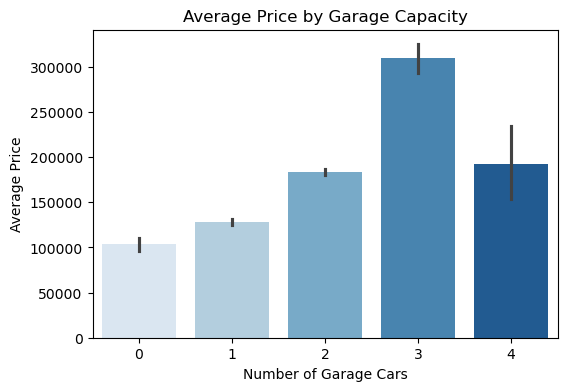

In [89]:
# Impact of Garage Capacity on Sale Price
plt.figure(figsize=(6,4))
sns.barplot(x='GarageCars', y='SalePrice', data=df, palette='Blues')
plt.title('Average Price by Garage Capacity')
plt.xlabel('Number of Garage Cars')
plt.ylabel('Average Price')
plt.show()

### Insights – Impact of Garage Capacity on Sale Price

Homes with a greater garage capacity (more cars) generally sell for higher prices compared to those with smaller or no garages.
The average sale price increases steadily as the number of garage spaces rises, reflecting the added utility, storage convenience, and buyer preference for properties with ample parking.
While a few outliers exist—such as smaller garages with unexpectedly high prices or larger garages with moderate prices—the overall trend clearly indicates that garage capacity is a strong positive factor influencing property value.

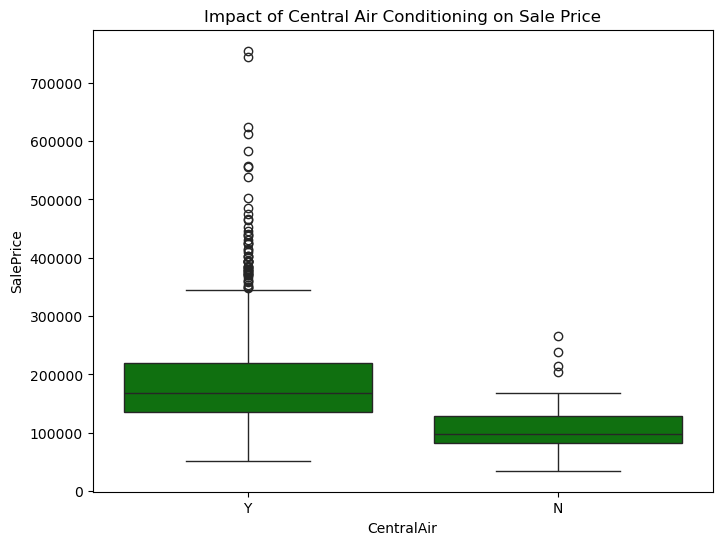

In [91]:
# Central Air conditioning impact
if 'CentralAir' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='CentralAir', y='SalePrice', data=df, color="green")
    plt.title('Impact of Central Air Conditioning on Sale Price')
    plt.show()

### Insights - Impact of Central Air Conditioning on Sale Price
Homes with central air conditioning (Y) generally sell for significantly higher prices than those without (N). The price range for houses with central AC is wider, showing greater variability and including some of the most expensive homes, while houses without it tend to have a lower maximum sale price. Although outliers exist—some costly homes lack central air and some cheaper ones have it—the overall trend clearly indicates that central air conditioning is a strong positive factor influencing home value.

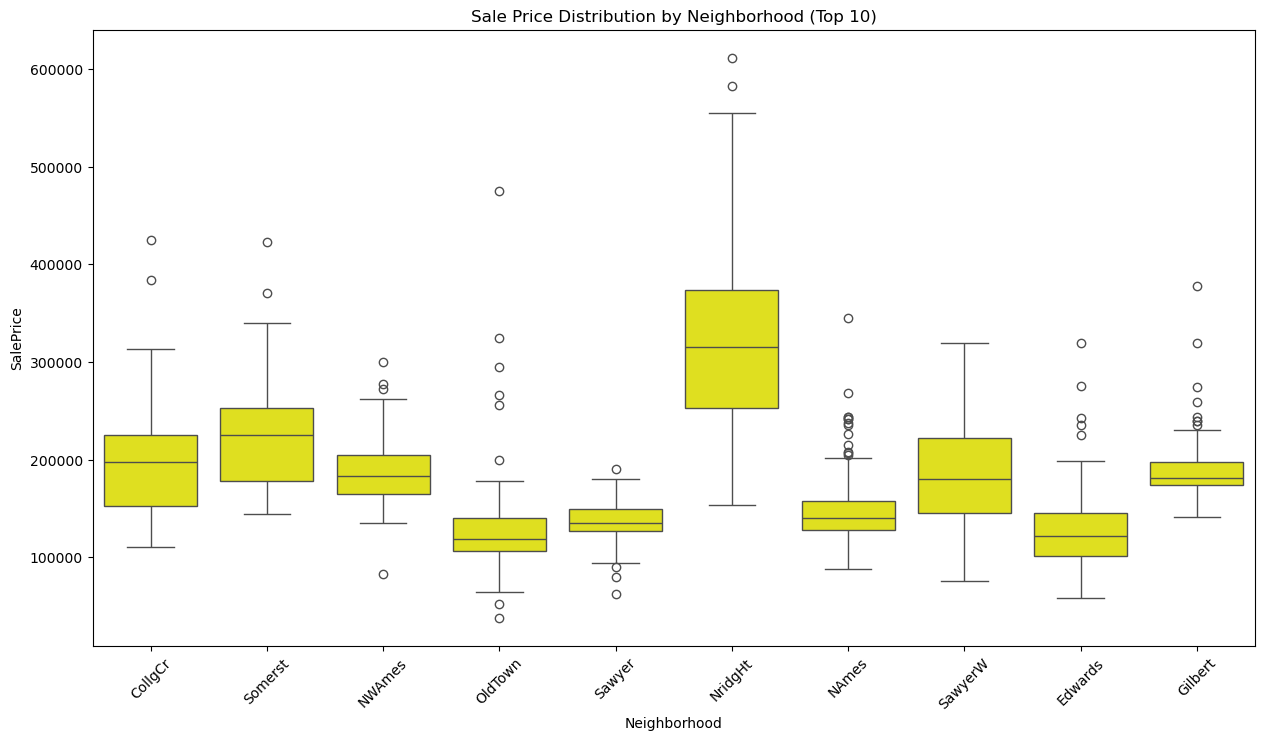

In [93]:
# Neighborhood analysis
top_neighborhoods = df['Neighborhood'].value_counts().head(10).index

plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df[df['Neighborhood'].isin(top_neighborhoods)], color="Yellow")
plt.title('Sale Price Distribution by Neighborhood (Top 10)')
plt.xticks(rotation=45)
plt.show()

### Insights - Sale Price Distribution by Neighborhood (Top 10)
Sale prices vary considerably across the top 10 neighborhoods, with NridgHt showing the highest median price and OldTown among the lowest. SawyerW and Edwards also have relatively lower median prices. The spread of prices differs by neighborhood, as seen in varying interquartile ranges—for instance, NridgHt has a wider range than NPkVill. Outliers exist in every neighborhood, indicating some homes sell for much higher or lower than typical values. Overall, this distribution highlights both typical price ranges and potential extremes, making it easy to compare home values across these key locations.

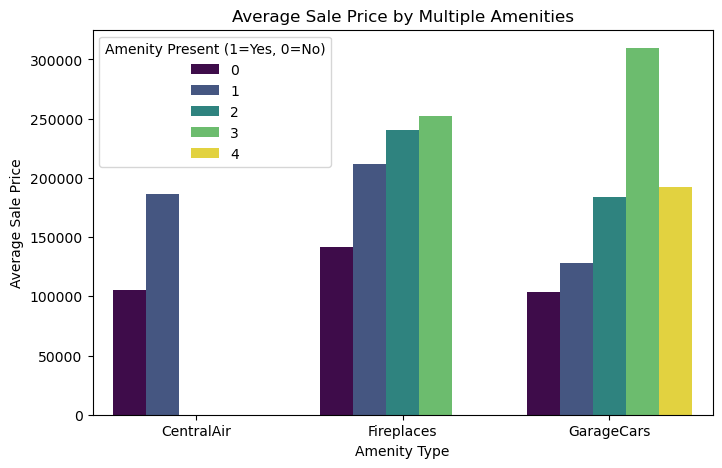

In [95]:
# relevant amenities
amenities = ['CentralAir', 'GarageCars', 'Fireplaces']

# Convert categorical to numeric (Y/N → 1/0)
if df['CentralAir'].dtype == 'object':
    df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})

# Create a long-form dataframe for plotting
df_melt = df.melt(id_vars='SalePrice', value_vars=amenities, 
                  var_name='Amenity', value_name='Value')

# Group and calculate mean SalePrice for each amenity level
amenity_avg = df_melt.groupby(['Amenity', 'Value'])['SalePrice'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Amenity', y='SalePrice', hue='Value', data=amenity_avg, palette='viridis')
plt.title('Average Sale Price by Multiple Amenities')
plt.xlabel('Amenity Type')
plt.ylabel('Average Sale Price')
plt.legend(title='Amenity Present (1=Yes, 0=No)')
plt.show()

### Insight – Impact of Multiple Amenities on Sale Price

Homes equipped with key amenities such as central air conditioning, garages, and fireplaces consistently command higher sale prices compared to those lacking them. The impact is most pronounced for garage capacity, followed closely by central air, both of which significantly enhance comfort and functionality. Although some exceptions exist like affordable homes with one or two amenities the overall pattern highlights that the presence of multiple amenities adds strong value, making these features crucial in influencing buyer decisions and property pricing.

## Price Segmentation

In [98]:
# Create price segments

df['PriceSegment'] = pd.qcut(df['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Analyze characteristics of each segment

segment_analysis = df.groupby('PriceSegment', observed=False).agg({
    'GrLivArea': 'mean',
    'TotalBath': 'mean',
    'OverallQual': 'mean',
    'HouseAge': 'mean',
    'HasGarage': 'mean',
    'HasFireplace': 'mean'
}).round(2)

display(segment_analysis)

,GrLivArea,TotalBath,OverallQual,HouseAge,HasGarage,HasFireplace
PriceSegment,,,,,,
Low,1113.54,1.50,4.81,62.55,0.82,0.19
Medium,1323.36,1.96,5.53,44.94,0.97,0.41
High,1590.45,2.53,6.42,23.16,0.99,0.64
Premium,2039.66,2.86,7.65,15.36,1.00,0.87


### Insights
1. Feature averages consistently rise across segments, with values increasing from Low to Premium homes.

2. The Premium segment leads in almost every aspect — larger living areas, more bathrooms, superior quality, newer construction, and higher chances of having a garage or fireplace.

3. On the other end, the Low segment reflects smaller spaces, fewer amenities, lower quality, and generally older houses, often lacking garages and fireplaces.

4. HouseAge shows an inverse trend — newer homes are more likely to fall into higher-priced categories, while older ones dominate lower segments.

5. Garages and fireplaces become increasingly common as property prices rise, reinforcing their role as desirable features in higher-value homes.

## Tasks: 8
### Prepare the Data for SQL

In [101]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [103]:
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
z_scores = z_scores.apply(zscore)
print(z_scores)

      LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.820172 -0.183061    -0.234947    -0.469113   0.396034   
1       -0.162590 -0.307482    -1.188919     2.296567  -1.208312   
2       -0.688656 -0.327352    -0.234947    -0.469113   0.277193   
3       -1.039366 -0.302073    -0.234947    -0.469113   1.853946   
4        0.012765 -0.001692     0.955480    -0.469113   0.217773   
...           ...       ...          ...          ...        ...   
1455    -0.951688 -0.125394    -1.188919    -0.469113   0.158353   
1456     0.056603 -0.119081    -1.188919    -0.694465  -1.089472   
1457    -0.776333 -0.247111    -0.234947     3.792083   0.309020   
1458    -0.688656 -0.320141     0.001508    -0.694465  -0.225762   
1459    -0.381784 -0.343943     0.001508    -0.694465  -1.117065   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0        -0.054965   -0.289994   -0.388864   -0.259745   0.241217  ...   
1        -1.096967   -0.208800    0

In [104]:
# Rename columns to avoid SQL issues (e.g., spaces, special characters)
df.columns = df.columns.str.replace(' ', '_')

# Display the cleaned dataset
print(df.head())

  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0       SC60       RL           65     8450   Pave      Reg         Lvl   
1       SC20       RL           80     9600   Pave      Reg         Lvl   
2       SC60       RL           68    11250   Pave      IR1         Lvl   
3       SC70       RL           60     9550   Pave      IR1         Lvl   
4       SC60       RL           84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... Price_per_sqft TotalSF TotalBath  \
0    AllPub    Inside       Gtl  ...     121.929825    2566       3.5   
1    AllPub       FR2       Gtl  ...     143.819334    2524       2.5   
2    AllPub    Inside       Gtl  ...     125.139978    2706       3.5   
3    AllPub    Corner       Gtl  ...      81.537566    2473       2.0   
4    AllPub       FR2       Gtl  ...     113.739763    3343       3.5   

  HouseAge RemodAge  Is_Luxury_Home  HasPool  HasFireplace  HasGarage HasBsmt  
0        5        5           

In [105]:
# Check columns and basic info
print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nTop 5 rows:")
display(df.head())

Columns: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Price_per_sqft,TotalSF,TotalBath,HouseAge,RemodAge,Is_Luxury_Home,HasPool,HasFireplace,HasGarage,HasBsmt
0,SC60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,121.929825,2566,3.5,5,5,0,0,0,1,1
1,SC20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,143.819334,2524,2.5,31,31,0,0,1,1,1
2,SC60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,125.139978,2706,3.5,7,6,0,0,1,1,1
3,SC70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,81.537566,2473,2.0,91,36,0,0,1,1,1
4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,113.739763,3343,3.5,8,8,0,0,1,1,1


In [106]:
# Calculate Z-scores for numerical columns
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))

# Define a threshold
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
df = df[~outliers]
print(f"Original dataset size: {df.shape}")
print(f"Dataset size after outlier removal: {df.shape}")

Original dataset size: (853, 90)
Dataset size after outlier removal: (853, 90)


In [167]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [199]:
# Define SQL Server connection details
server = 'localhost'  
database = 'master'  
username = 'root'              # MySQL username
password = quote_plus('123@Samad')   # password
host = 'localhost'             # server name
port = 3306                    # default MySQL port
database = 'eda'               
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus


# Create a MySQL connection URL
connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(connection_url)

# Transfer DataFrame to MySQL
table_name = 'realestate_cleaned'
df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"Dataset successfully uploaded to MySQL table: {table_name}")

# Verify table
with engine.connect() as conn:
    result = conn.execute(text(f"SELECT COUNT(*) FROM {table_name}"))
    print("Total rows:", result.scalar())

engine.dispose()

Dataset successfully uploaded to MySQL table: realestate_cleaned
Total rows: 853


In [201]:
# Create the MySQL connection URL
connection_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create the engine
engine = create_engine(connection_url)

# Test the connection by listing tables
with engine.connect() as conn:
    result = conn.execute(text("SHOW TABLES"))
    tables = [row[0] for row in result]
    print("Connection successful!")
    if len(tables) > 0:
        print("Tables in the database:", tables)
    else:
        print("No tables found in this database yet.")

# Close the connection
engine.dispose()
print("Connection closed successfully.")

Connection successful!
Tables in the database: ['realestate_cleaned']
Connection closed successfully.


In [217]:
# Fetch top 5 rows
try:
    df = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 10", engine)  # use variable table_name
    print("Top 5 rows from the table:")
    print(df)
except Exception as e:
    print("Error:", e)

Top 5 rows from the table:
  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0       SC60       RL           65     8450   Pave      Reg         Lvl   
1       SC60       RL           68    11250   Pave      IR1         Lvl   
2       SC60       RL           84    14260   Pave      IR1         Lvl   
3       SC20       RL           70    11200   Pave      Reg         Lvl   
4       SC20       RL            0    12968   Pave      IR2         Lvl   
5       SC20       RL            0    10920   Pave      IR1         Lvl   
6       SC45       RM           51     6120   Pave      Reg         Lvl   
7       SC20       RL            0    11241   Pave      IR1         Lvl   
8       SC20       RL           66    13695   Pave      Reg         Lvl   
9       SC20       RL           70     7560   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope  ... Price_per_sqft TotalSF TotalBath  \
0    AllPub    Inside       Gtl  ...     121.929825    2566       3.5   
1

## 🔑 Key Findings

1. Size has a major influence – Both above-ground living space and basement area show a strong positive link with house prices, making square footage one of the biggest drivers of value.

2. Quality outshines everything – The overall quality rating stands out as the single most powerful predictor of sale price.

3. Amenities boost desirability – Features like garages, fireplaces, and finished basements consistently raise property values.

4. Location plays a decisive role – Certain neighborhoods command significantly higher price per square foot compared to others.

5. Age matters – Newly built or recently renovated homes tend to sell at higher prices than older, outdated ones.

6. Market cycles are evident – Fluctuations across years suggest external economic factors, such as the financial climate, impact housing prices.

## 📌 Recommendations

1. Strategic Pricing – Set prices by giving primary weight to square footage, quality scores, and the presence of high-value amenities.

2. Smart Investment Choices – Prioritize upgrades that improve overall quality and add features like modern garages or fireplaces, as these yield higher returns.

3. Marketing Advantage – Highlight property size, quality, and premium amenities in promotional material to attract top-tier buyers.

4. Location-Based Analysis – Conduct deeper studies of high-performing neighborhoods to better understand demand drivers.

5. Economic Awareness – Monitor broader market and economic indicators to anticipate price trends and adjust strategies accordingly.

6. Customer-Centric Approach – Gather buyer feedback through surveys to identify the most valued amenities and tailor offerings accordingly.

## 🏡 Conclusion

This analysis sheds light on the most influential factors shaping house prices, from size and quality to amenities, location, and market timing. These insights provide a strong, evidence-backed foundation for smarter pricing, investment, and marketing strategies. Looking ahead, applying advanced regression models will allow for more accurate price predictions, helping both sellers and investors make data-driven decisions with confidence.